# Results instantaneous velocity and velocity from fitting with ABP's model, estimation of orientation


28/04/2024

In [1]:
# importamos las librerias
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors 
import seaborn as sns
import scipy
from scipy.optimize import minimize
from scipy.optimize import curve_fit

# python file for Fuctions to fitting data
from Fit_functions import *

In [2]:
# for plotting
plt.rcParams.update({
    'font.size': 30,
    "text.usetex": True,
    "font.family": "Helvetica"
    })

In [3]:
# Extrayendo los resultados de matlab
Root = 'D:\\Videos_Lab\\20231114_Janus_CPyCl_1mM\\coords\\'

File_names0 = pd.read_csv(Root+'filenames.txt',sep='\t')
File_names = np.array(File_names0)

VelRes = pd.read_csv(Root+'results/Results_active.csv')
VelRes

,laser power,D_q,T_q,D_T,V_ins,V_std,V_fit
0,123mw_01_19500,9.315970,0.107343,3.084500e-14,1.388400e-07,0,1.148300e-07
1,123mw_01_300-5,0.918339,1.088920,2.685500e-14,1.952900e-07,0,1.817500e-07
2,123mw_01_31500,0.018402,54.340300,2.995800e-14,1.571100e-07,0,1.049500e-07
3,123mw_01_32000,4.564440,0.219085,2.768600e-14,1.405200e-07,0,1.198800e-07
4,123mw_01_39750,0.014043,71.210100,3.025100e-14,1.832500e-07,0,1.530600e-07
5,123mw_01_54000,0.015561,64.262300,2.919400e-14,1.595400e-07,0,1.034100e-07
6,123mw_01_9000-,30.852300,0.032412,3.185100e-14,1.167100e-07,0,5.944100e-08
7,174mw_01_100-7,36.726400,0.027228,7.048500e-14,1.787400e-07,0,1.120700e-07
8,205mw_01_100-7,49.356700,0.020261,4.179200e-14,1.186000e-07,0,4.694500e-08
9,205mw_01_34500,57.490500,0.017394,3.382900e-14,1.251500e-07,0,7.724000e-08


## Parametros en el experimento

In [66]:
# Estimación del coef de difusion por stokes-Einstein
fs = 50 # Frame rate
Pix2microns = 0.15384 # spatial conversion factor
kB = 1.38064852e-23
Temp = 20.0
Temp = Temp+273.15
etaw = 1.001e-3
R = (4.640/2.0)*(1e-6)
DTw = kB*Temp/(6.0*np.pi*etaw*R)

DTw = DTw*((1e6)**2)
DRw = kB*Temp/(8.0*np.pi*etaw*(R**3))
TRw = 1/DRw
print("Theoric D_T:", DTw)
print("Theoric D_R:", DRw)
print("Theoric T_R:", TRw)

Theoric D_T: 0.09245913897630224
Theoric D_R: 0.012883537870137244
Theoric T_R: 77.61843137185946


In [15]:
#Modificando el último nombre
VelRes.at[19, 'laser power'] = '0mW_01_100-7'

In [16]:
# agregando una columna con los valores de Potencias
powerlist = [int(power[:-11]) for power in VelRes['laser power']]
VelRes['P(mW)'] = powerlist

In [17]:
VelRes['Eta'] = (kB*Temp/((VelRes['D_T'])*6.0*np.pi*R))*(1e3)
eta_norm = 2.776051
VelRes['Eta_n'] = VelRes['Eta']/eta_norm

In [18]:
# getting vins std
Vins_std = [(np.loadtxt(Root+'results\\Vins_'+name[0]+'.dat')).std() for name in File_names]

In [19]:
VelRes['V_std'] = Vins_std
VelRes

,laser power,D_q,T_q,D_T,V_ins,V_std,V_fit,P(mW),Eta,Eta_n
0,123mw_01_19500,9.315970,0.107343,3.084500e-14,1.388400e-07,8.481259e-08,1.148300e-07,123,3.000538,1.080866
1,123mw_01_300-5,0.918339,1.088920,2.685500e-14,1.952900e-07,7.593491e-08,1.817500e-07,123,3.446345,1.241456
2,123mw_01_31500,0.018402,54.340300,2.995800e-14,1.571100e-07,7.778822e-08,1.049500e-07,123,3.089378,1.112868
3,123mw_01_32000,4.564440,0.219085,2.768600e-14,1.405200e-07,8.721940e-08,1.198800e-07,123,3.342902,1.204193
4,123mw_01_39750,0.014043,71.210100,3.025100e-14,1.832500e-07,7.930415e-08,1.530600e-07,123,3.059456,1.102089
5,123mw_01_54000,0.015561,64.262300,2.919400e-14,1.595400e-07,6.655767e-08,1.034100e-07,123,3.170227,1.141992
6,123mw_01_9000-,30.852300,0.032412,3.185100e-14,1.167100e-07,5.842239e-08,5.944100e-08,123,2.905767,1.046727
7,174mw_01_100-7,36.726400,0.027228,7.048500e-14,1.787400e-07,8.797913e-08,1.120700e-07,174,1.313068,0.472999
8,205mw_01_100-7,49.356700,0.020261,4.179200e-14,1.186000e-07,6.285295e-08,4.694500e-08,205,2.214577,0.797744
9,205mw_01_34500,57.490500,0.017394,3.382900e-14,1.251500e-07,6.355646e-08,7.724000e-08,205,2.735866,0.985524


In [37]:
len(VelRes['P(mW)'])

20

# Functions

In [4]:
def MSD(X,T):
    jmax = int(np.floor(2*np.floor(1*np.sqrt(len(X)))))
    ll = len(X)-jmax
    MSD = np.zeros(jmax)
    tau = np.zeros(jmax)
    Dt = 1/50.0#np.round(np.abs(T[1]-T[0]),3)
    #print(Dt)
    
    for j in range(jmax):
        tau[j] = Dt*(j+1)
        X0 = X[:ll]
        Xt = X[j+1:ll+j+1]
        DXt = Xt-X0
        MSD[j] = np.mean(np.power(DXt,2))
    return tau,MSD

In [35]:
def fit_MSAD(Tau,MSDq):
    # fitting data with errobars
    parameters, covariance = curve_fit(linear_func, Tau,MSDq)
    SE = np.sqrt(np.diag(covariance))
    # Print the results
    #print("Coefficients: ", parameters)
    #print("Standard errors: ",SE)

    # Elementos para graficar
    fitA1 = parameters[0]
    fitB1 = parameters[1]
    fitX1 = np.linspace(0.0,Tau.max(),500)
    fitY1 = linear_func(fitX1,fitA1,fitB1)#,fitv,fitTr)

    Dr = parameters[0]/2
    Tr = 1/Dr
    #print('Dr: ', Dr)
    #print('Tr: ', Tr)
    return Dr,Tr, fitX1, fitY1

In [67]:
# estimation of velocity
def velocity(X,Y,T):
    # computing instantaneous velocity
    DX = X[1::] - X[:-1:] 
    DY = Y[1::] - Y[:-1:] 
    DT = T[1::] - T[:-1:]

    Vx = DX/DT
    Vy = DY/DT
    V = np.stack((Vx,Vy),axis=1)
    speed = np.sqrt(Vx**2 + Vy**2)
    return V, speed

In [104]:
def getdata(name,Root):
    fs = 50 # frame rate

    file_path = os.path.join(Root, name + '.txt')
    X0, Y0, qx, qy, t = np.loadtxt(file_path, unpack=True)
    Vins0 = np.loadtxt(Root+'results\\Vins_'+name+'.dat')
    Q0 = np.loadtxt(Root+'results\\q_'+name+'.dat')

    # converting t into real time in seconds
    t = t/fs
    return t,X0,Y0,qx,qy,Vins0,Q0

In [29]:
#restando 2 pi
# implementando una forma de hacer los angulos entre -inf e inf
def fixtheta(theta,dq):
    for i,dqval in enumerate(dq):
        if np.abs(dqval) > np.pi: 
            # si dq es mayor a pi (hay un salto de discontinuidad) sumar o restar 2pi de acuerdo al signo de dq
            theta[i+1:] = theta[i+1:]-np.sign(dqval)*(2*np.pi)
    return theta

In [30]:
# Ahora toca arreglar puntos que se salen del comportamiento general
# promediar sobre los 50 valores previos (el segundo anterior)
def outlier_replace(theta,q_std,n):
    for i,dqval in enumerate(dq):
        if np.abs(dqval) > 2*q_std: 
            # si dq es mayor 2std (hay un salto de discontinuidad) reasignar valor promedio
            if i>n:       
                mu = theta[i-n:i].mean() # promedio sobre el segundo anterior
                d = theta[i+1] - mu
                theta[i+1:] = theta[i+1:]-d
    return theta

In [31]:
# Suavizado de datos a partir del smooth
def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

In [32]:
def windows(dq,m):
    dq_reshaped = dq[:len(dq)//m*m].reshape(-1, m) # Reshape the array into a 2D array with shape (N//m, m)

    # Calculate the standard deviation along the rows
    stdq = np.std(dq_reshaped, axis=1)

    std_sequence = np.arange(len(stdq))*m#*(m/50)
    time_std = std_sequence/fs
    
    # Necesitamos ahora un arreglo que nos guarde los intervalos en los que se puede calcular MSAD
    # para eso pueda que haga falta  un arreglo de booleanos
    decision = [stvalue < 0.25 for stvalue in stdq]

    # Condensando todo en una tabla

    StDF = pd.DataFrame({'index':std_sequence,'Std Deviation':stdq,'suitable':decision})
    return StDF

In [33]:
def delimitations(StDF):
    starts = []
    ends = []

    breaks = True
    for i, cond in enumerate(StDF['suitable']):
        if breaks:
            if cond==True:
                starts.append(StDF['index'][i])
                breaks = False 
        if cond==False:
            if breaks==False:
                ends.append(StDF['index'][i])
                breaks = True
    # adding the last point
    if breaks==False:
        if StDF['index'][i]==starts[-1]:
            ends.append(StDF['index'][i]+m)
        else:
            ends.append(StDF['index'][i])
    return starts,ends

## For smoothing data

In [58]:
# Suavizado de datos a partir del smooth, usando la media
def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

In [ ]:
def plotXYsmooth(x,y,t,xsmooth,ysmooth):
    

# Rotational diffusion time estimation

In [61]:
%%time
# ------------------------------------------------------------------
X = []
Y = []
Q = []
T = []

TAU = [] 
MSAD = []
DR = []
TR = []

Nfilename = []
NPowers = []
Starts = []
Stops = []

# Corriendo lo anterior para todos los archivos
for npower, filename in enumerate(File_names):
    #print(filename)
    # extracting data from that filename
    t,X0,Y0,qx,qy,Vins0,Q0 = getdata(filename[0],Root)
    
    # computing theta
    theta0 = np.arctan2(qy,qx)
    
    # Estimando las diferencias absolutas de la orientación
    dq = (theta0[1:]-theta0[:-1]) 
    q_std = np.pi/2
    
    # implementando una forma de hacer los angulos entre -inf e inf
    theta = fixtheta(theta0,dq)
    
    # volviendo a estimar diferencia de angulos
    dq = (theta[1:]-theta[:-1]) 
    # Estableciendo un nuevo criterio para corregir los datos
    q_std = 0.55
    
    theta = outlier_replace(theta,q_std,50) # average over 50 values
    
    # localizando las regiones bien comportadas de theta
    # recalculando dq
    dq = (theta[1:]-theta[:-1]) 

    # Estimando la desviación estandar en ventanas de 10s (500 cuadros)

    m = 1000  # Number of values to group together
    
    StDF = windows(dq,m)
    # storing coords
    X.append(X0)
    Y.append(Y0)
    Q.append(theta)
    T.append(t)
    
    # ahora solo falta obtener los indices iniciales y finales para calcular el MSAD
    starts, ends = delimitations(StDF)
    
    # Computing the values of interest
    for start,stop in zip(starts,ends):
        
        # computing MSAD
        Tau, MSDq = MSD(theta[start:stop],t[start:stop])

        # applying data fitting
        Dr,Tr,fitx,fity = fit_MSAD(Tau,MSDq)
        
        
        # -----------------------------------------------------------
        # Suavisado de la trayectoria
        # Suponiendo un tamaño dado a partir de la media de Tr
        
        
        # Storing the results -----------------------------------------------------

        TAU.append(Tau)
        MSAD.append(MSDq)
        DR.append(Dr)
        TR.append(Tr)

        Nfilename.append(filename[0][:-6])
        NPowers.append(VelRes['P(mW)'][npower])
        Starts.append(start)
        Stops.append(stop)
        

CPU times: total: 17.8 s
Wall time: 5.09 s


In [62]:
# condensando todo en una tabla
TrDF = pd.DataFrame({'Filename':Nfilename,'P(mW)':NPowers,'Start':Starts,'Stop':Stops,'Dr':DR,'Tr':TR})
TrDF

,Filename,P(mW),Start,Stop,Dr,Tr
0,01_Laser123mw_01_19500-29500,123,0,7000,0.020626,48.482480
1,01_Laser123mw_01_19500-29500,123,8000,9000,0.027733,36.058605
2,01_Laser123mw_01_300-5000,123,0,3000,0.019861,50.350310
3,01_Laser123mw_01_31500-35500,123,0,2000,0.012450,80.320491
4,01_Laser123mw_01_32000-47500,123,0,3000,0.018604,53.750724
...,...,...,...,...,...,...
75,01_Laser406mw_03_100-27000,406,8000,9000,0.044108,22.671746
76,01_Laser406mw_03_100-27000,406,13000,15000,0.045324,22.063447
77,01_Laser406mw_03_100-27000,406,16000,23000,0.047543,21.033688
78,01_Laser406mw_03_100-27000,406,24000,25000,0.112948,8.853598


<Figure size 640x480 with 0 Axes>

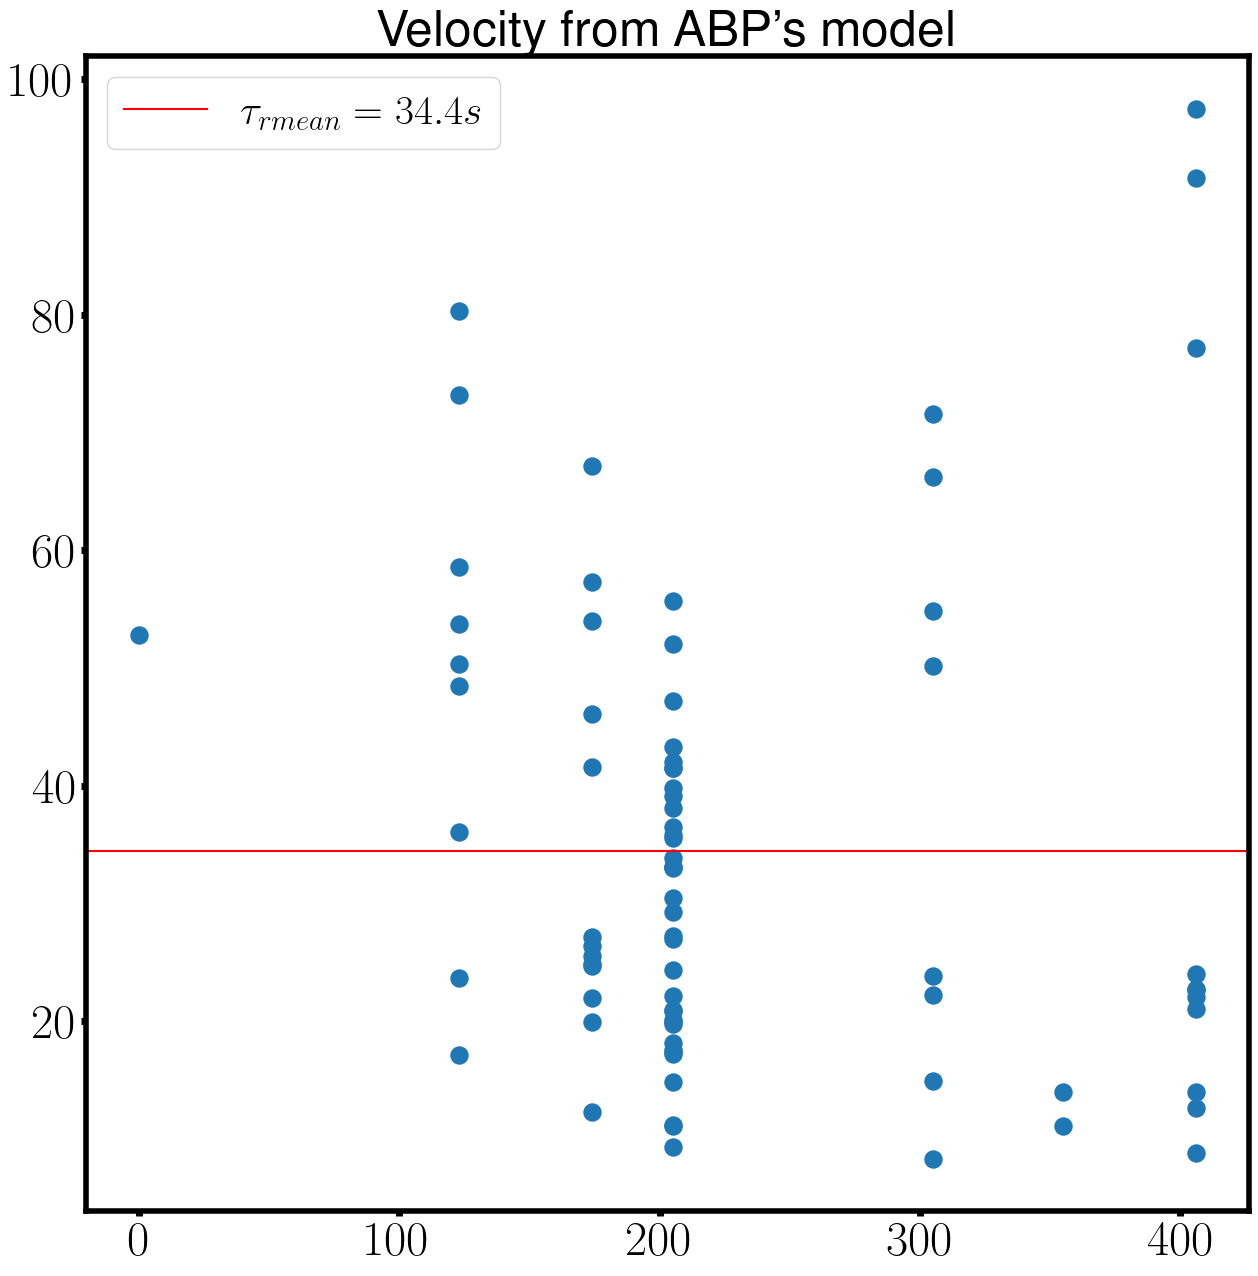

In [63]:
# graficando los tiempos de difusión rotacional

plt.clf()
plt.rcParams.update({'font.size': 30})
fig, (ax1) = plt.subplots(1, figsize=(15, 15)) #you can add ax1, ax2 etc
plt.scatter(TrDF['P(mW)'],TrDF['Tr'],marker = '.', s = 600,alpha=1)
#plt.plot(t[1000:-1000],smoothed_x[1000:-1000],'-',color='black',linewidth=2.8)

plt.axhline(y = TrDF['Tr'].mean(), color = 'r', linestyle = '-',label=r'$\tau_{rmean}='+str(TrDF['Tr'].mean())[:4]+' s$')

#plt.plot(t[4400:4700],theta[4400:4700],'-',linewidth=2.8)
#setting scale
#plt.xscale("log")
#plt.yscale("log")

plt.rc('xtick', labelsize=35) 
plt.rc('ytick', labelsize=35)  
#plt.xlabel(r'$time (s)$', size=50)
#plt.ylabel(r'$q (rad)$', size=50)
plt.title("Velocity from ABP's model")
plt.legend(loc='upper left')

#changing the width of axis lines
for axis in ['top','bottom','left','right']:
    ax1.spines[axis].set_linewidth(4)

plt.tick_params(width=5)

(array([10., 11., 16.,  6.,  8.,  8.,  3.,  8.,  2.,  2.,  2.,  1.,  1.,
         0.,  2.]),
 array([ 8.31482422, 14.25833556, 20.2018469 , 26.14535825, 32.08886959,
        38.03238093, 43.97589227, 49.91940361, 55.86291495, 61.8064263 ,
        67.74993764, 73.69344898, 79.63696032, 85.58047166, 91.52398301,
        97.46749435]),
 <BarContainer object of 15 artists>)

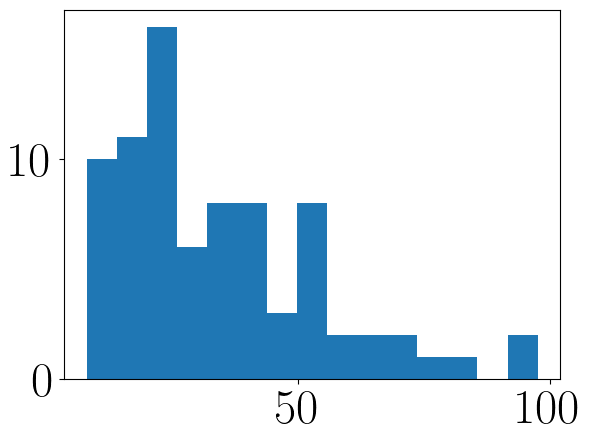

In [64]:
plt.hist(TrDF['Tr'],bins=15)

In [65]:
# Si consideramos solo los casos donde Tr>20.0
Tr_mean = (TrDF.loc[(TrDF['Tr']>20.0)])['Tr'].mean()
Tr_mean

41.08680540865872

# Smoothing trajectories 

## Sobre la trayectoria completa

In [59]:
# Suponiendo un tamaño dado a partir de la media de Tr
window_size = int(np.mean(TR)*fs)  # multiply by fs because in terms of frames

smoothed_y = smooth(Y0,window_size)
smoothed_x = smooth(X0,window_size)

In [72]:
%%time
Vels = []
Speeds = []
VMean = []
VStd = []

# usando una ventana de tiempo Tr_mean
window_size = int(Tr_mean*fs)
    
for iname,filename in enumerate(File_names):
    # extrayendo los datos de coordenadas en micras
    x = X[iname]*Pix2microns
    y = Y[iname]*Pix2microns
    t = T[iname]
    
    # suavisando los datos a través del promedio
    
    s_x = smooth(x,window_size)
    s_y = smooth(y,window_size)
    # recortando los datos sesgados (aprox Tr/2)
    crop_size = int((window_size/2)+1)
    # Calculando la velocidad instantanea
    v,speed = velocity(s_x,s_y,t)
    
    # estimando velocidad instantanea promedio
    vmean = speed[crop_size:-crop_size].mean()
    vstd = speed[crop_size:-crop_size].std()
    # storing data
    Vels.append(v)
    Speeds.append(speed)
    VMean.append(vmean)
    VStd.append(vstd)
    

CPU times: total: 453 ms
Wall time: 464 ms


In [74]:
# adding the results to velRes
VelRes['vi'] = VMean
VelRes['vistd'] = VStd

In [75]:
VelRes

,laser power,D_q,T_q,D_T,V_ins,V_std,V_fit,P(mW),Eta,Eta_n,vi,vistd
0,123mw_01_19500,9.315970,0.107343,3.084500e-14,1.388400e-07,8.481259e-08,1.148300e-07,123,3.000538,1.080866,0.089664,0.039657
1,123mw_01_300-5,0.918339,1.088920,2.685500e-14,1.952900e-07,7.593491e-08,1.817500e-07,123,3.446345,1.241456,0.187932,0.023913
2,123mw_01_31500,0.018402,54.340300,2.995800e-14,1.571100e-07,7.778822e-08,1.049500e-07,123,3.089378,1.112868,0.137096,0.038093
3,123mw_01_32000,4.564440,0.219085,2.768600e-14,1.405200e-07,8.721940e-08,1.198800e-07,123,3.342902,1.204193,0.103822,0.052721
4,123mw_01_39750,0.014043,71.210100,3.025100e-14,1.832500e-07,7.930415e-08,1.530600e-07,123,3.059456,1.102089,0.169163,0.040362
5,123mw_01_54000,0.015561,64.262300,2.919400e-14,1.595400e-07,6.655767e-08,1.034100e-07,123,3.170227,1.141992,0.139705,0.027933
6,123mw_01_9000-,30.852300,0.032412,3.185100e-14,1.167100e-07,5.842239e-08,5.944100e-08,123,2.905767,1.046727,0.061192,0.020562
7,174mw_01_100-7,36.726400,0.027228,7.048500e-14,1.787400e-07,8.797913e-08,1.120700e-07,174,1.313068,0.472999,0.131982,0.057567
8,205mw_01_100-7,49.356700,0.020261,4.179200e-14,1.186000e-07,6.285295e-08,4.694500e-08,205,2.214577,0.797744,0.075790,0.033945
9,205mw_01_34500,57.490500,0.017394,3.382900e-14,1.251500e-07,6.355646e-08,7.724000e-08,205,2.735866,0.985524,0.084402,0.035719


# comparando velocidades

<Figure size 640x480 with 0 Axes>

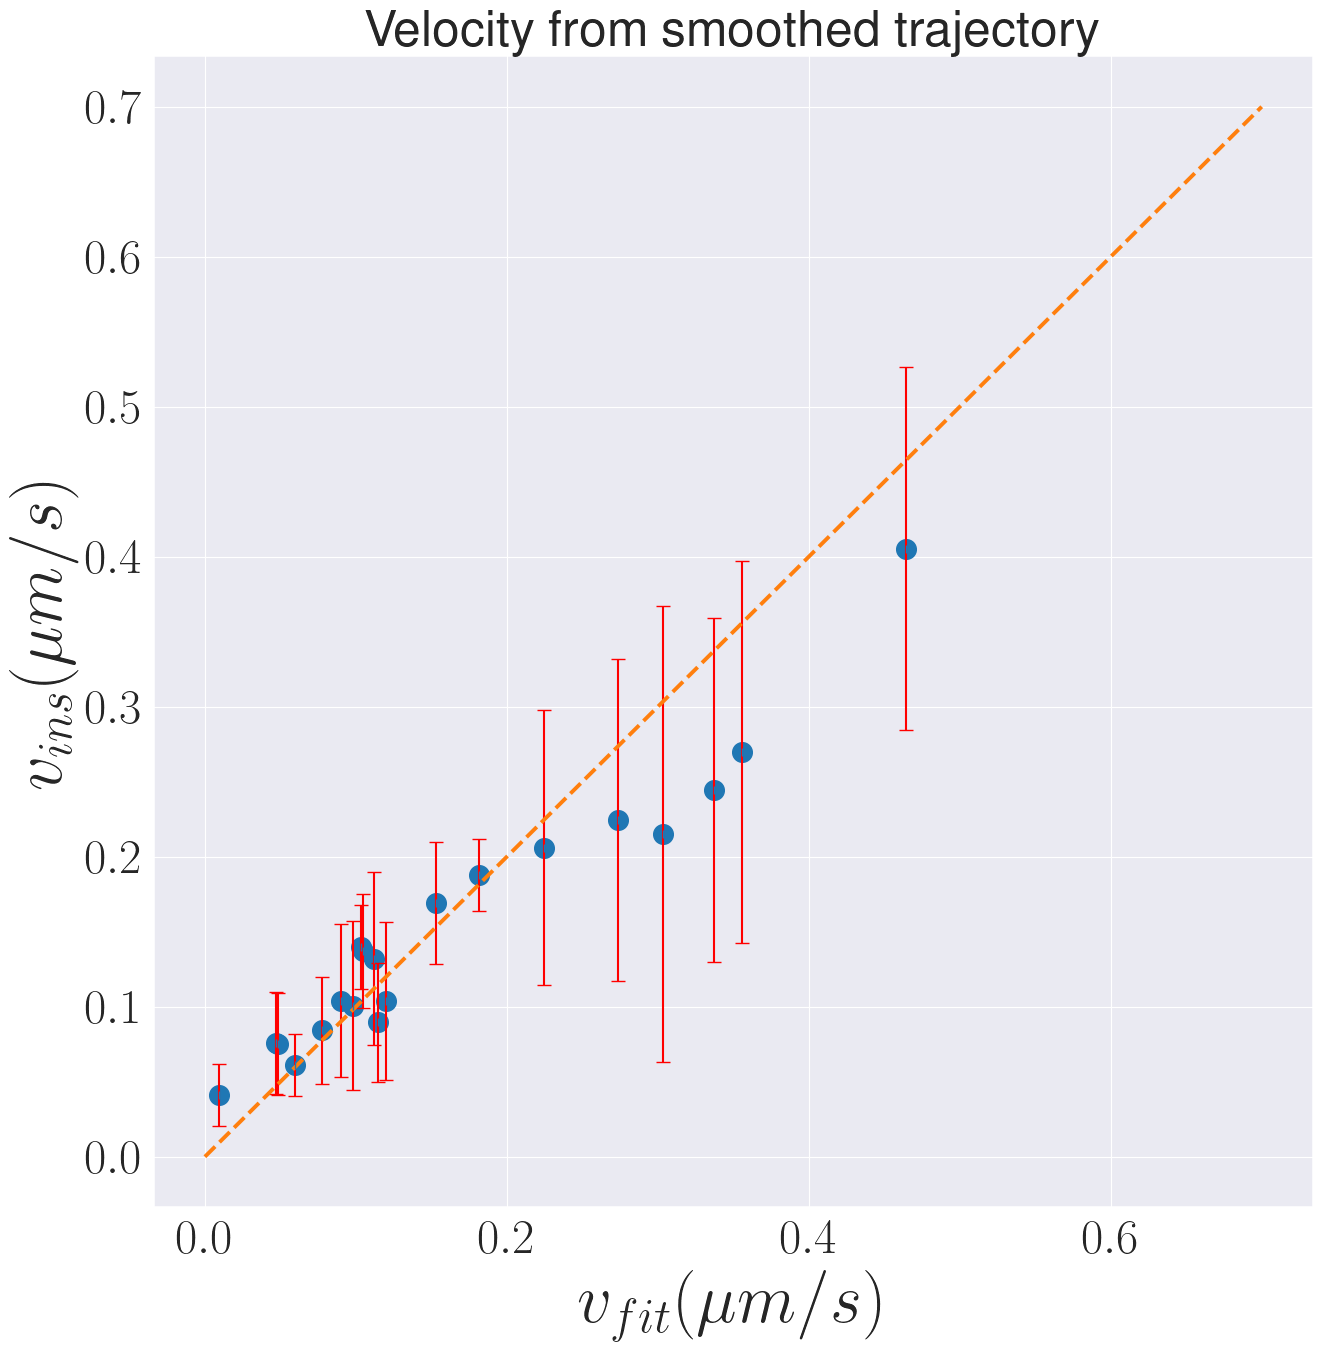

In [80]:
plt.clf()
plt.rcParams.update({'font.size': 30})

velx = np.linspace(0.0, 0.7,100)
vely = velx

with sns.axes_style("darkgrid"):
    fig, (ax1) = plt.subplots(1, figsize=(15, 15)) #you can add ax1, ax2 etc
    plt.scatter(VelRes['V_fit']*(1e6),VelRes['vi'],marker = '.', s = 800,alpha=1)
    
    plt.errorbar(VelRes['V_fit']*(1e6), VelRes['vi'], yerr=VelRes['vistd'],capsize=5,fmt="|",ecolor='red')
    plt.plot(velx,vely,'--',linewidth=2.8)

    #setting scale
    #plt.xscale("log")
    #plt.yscale("log")

    plt.rc('xtick', labelsize=35) 
    plt.rc('ytick', labelsize=35)  
    
    plt.xlabel(r'$v_{fit} (\mu m/s)$', size=50)
    plt.ylabel(r'$v_{ins} (\mu m/s)$', size=50)
    plt.title("Velocity from smoothed trajectory")

    #changing the width of axis lines
    for axis in ['top','bottom','left','right']:
        ax1.spines[axis].set_linewidth(4)

    plt.tick_params(width=5)

# laser power vs velocity (instantaneous and from ABP's model)

In [78]:
# fitting data with errobars
parameters, covariance = curve_fit(linear_func, VelRes['P(mW)'],VelRes['V_fit'])
SE = np.sqrt(np.diag(covariance))
# Print the results
print("Coefficients: ", parameters)
print("Standard errors: ",SE)

# Elementos para graficar
fitA = parameters[0]
fitB = parameters[1]
fitX = np.linspace(0.0,440,500)
fitY = linear_func(fitX,fitA,fitB)#,fitv,fitTr) 

Coefficients:  [7.06091146e-10 1.05837027e-08]
Standard errors:  [1.82269044e-10 4.47188637e-08]


<Figure size 640x480 with 0 Axes>

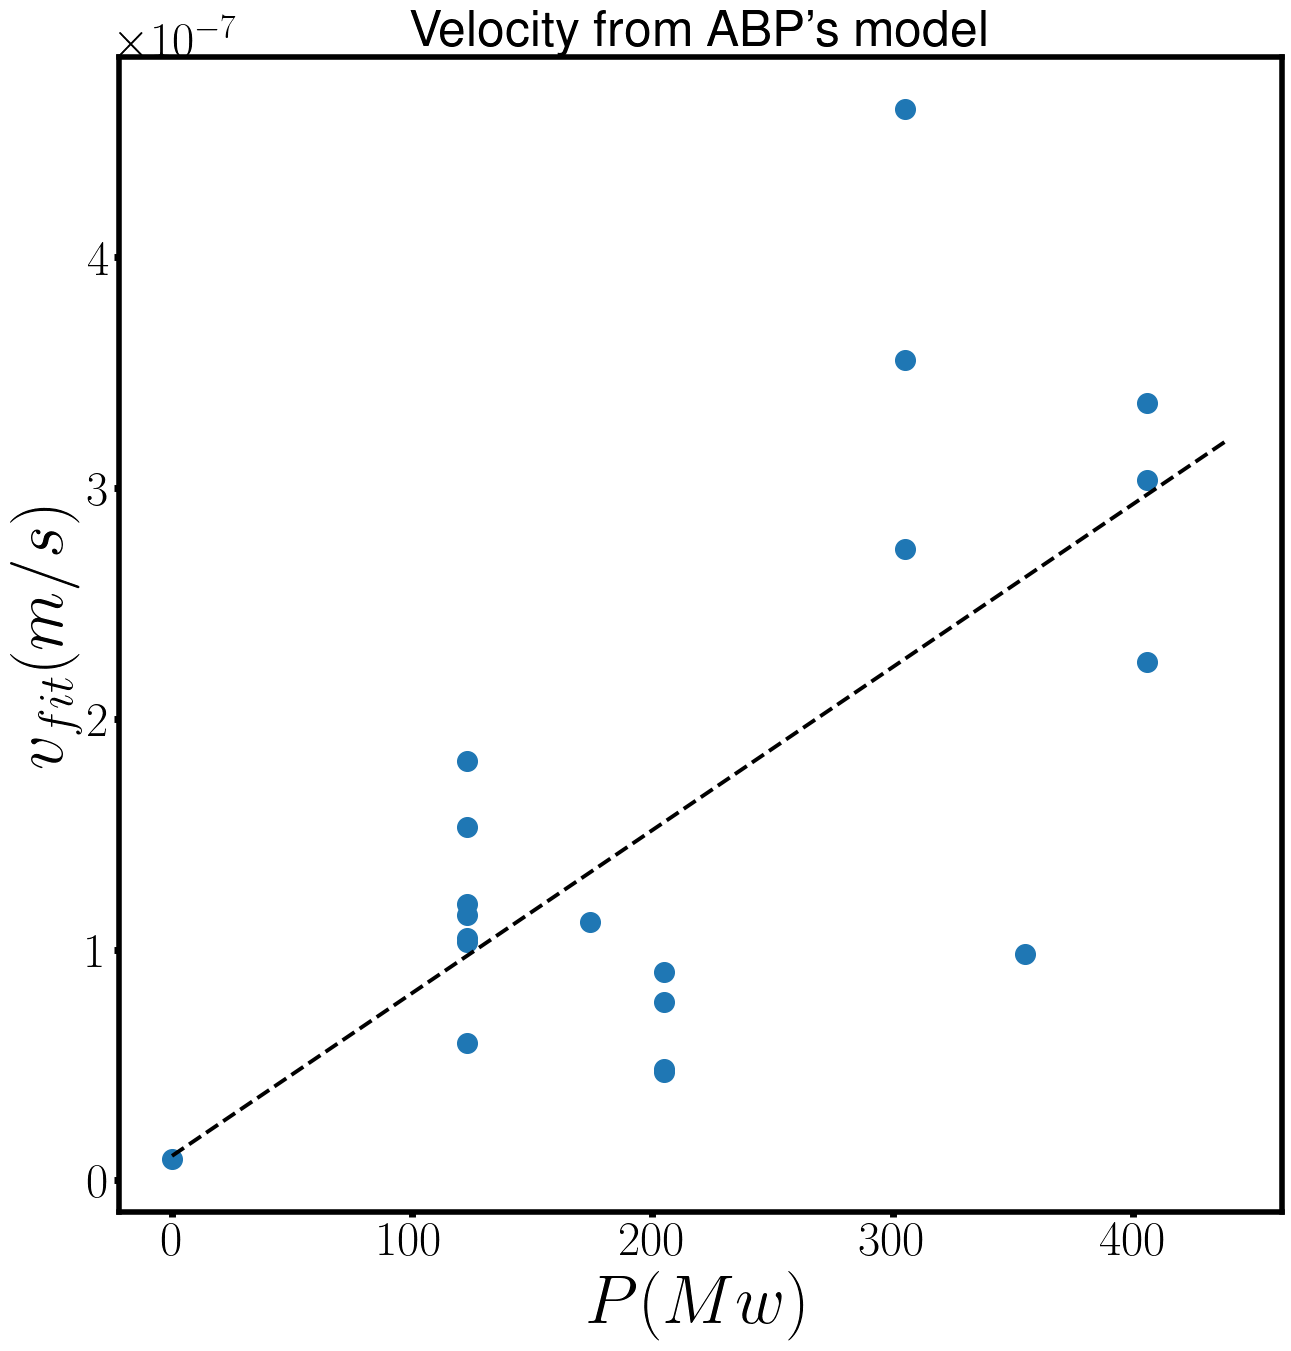

In [79]:
plt.clf()
plt.rcParams.update({'font.size': 30})
fig, (ax1) = plt.subplots(1, figsize=(15, 15)) #you can add ax1, ax2 etc
plt.scatter(VelRes['P(mW)'],VelRes['V_fit'],marker = '.', s = 800,alpha=1)#,label=File_names[Iparticle][:13])
plt.plot(fitX,fitY,'--',color='black',linewidth=2.8)
#setting scale
#plt.xscale("log")
#plt.yscale("log")

plt.rc('xtick', labelsize=35) 
plt.rc('ytick', labelsize=35)  
plt.xlabel(r'$P(Mw)$', size=50)
plt.ylabel(r'$v_{fit} (m/s)$', size=50)
plt.title("Velocity from ABP's model")

#changing the width of axis lines
for axis in ['top','bottom','left','right']:
    ax1.spines[axis].set_linewidth(4)

plt.tick_params(width=5)

## $v_{ins}$ from smoothing trajectory

In [15]:
# fitting data with errobars
parameters, covariance = curve_fit(linear_func, VelRes['P(mW)'],VelRes['V_ins'])
SE = np.sqrt(np.diag(covariance))
# Print the results
print("Coefficients: ", parameters)
print("Standard errors: ",SE)

# Elementos para graficar
fitA1 = parameters[0]
fitB1 = parameters[1]
fitX1 = np.linspace(0.0,440,500)
fitY1 = linear_func(fitX1,fitA1,fitB1)#,fitv,fitTr) 

Coefficients:  [6.0381475e-10 7.6658377e-08]
Standard errors:  [1.39739407e-10 3.42844162e-08]


<Figure size 640x480 with 0 Axes>

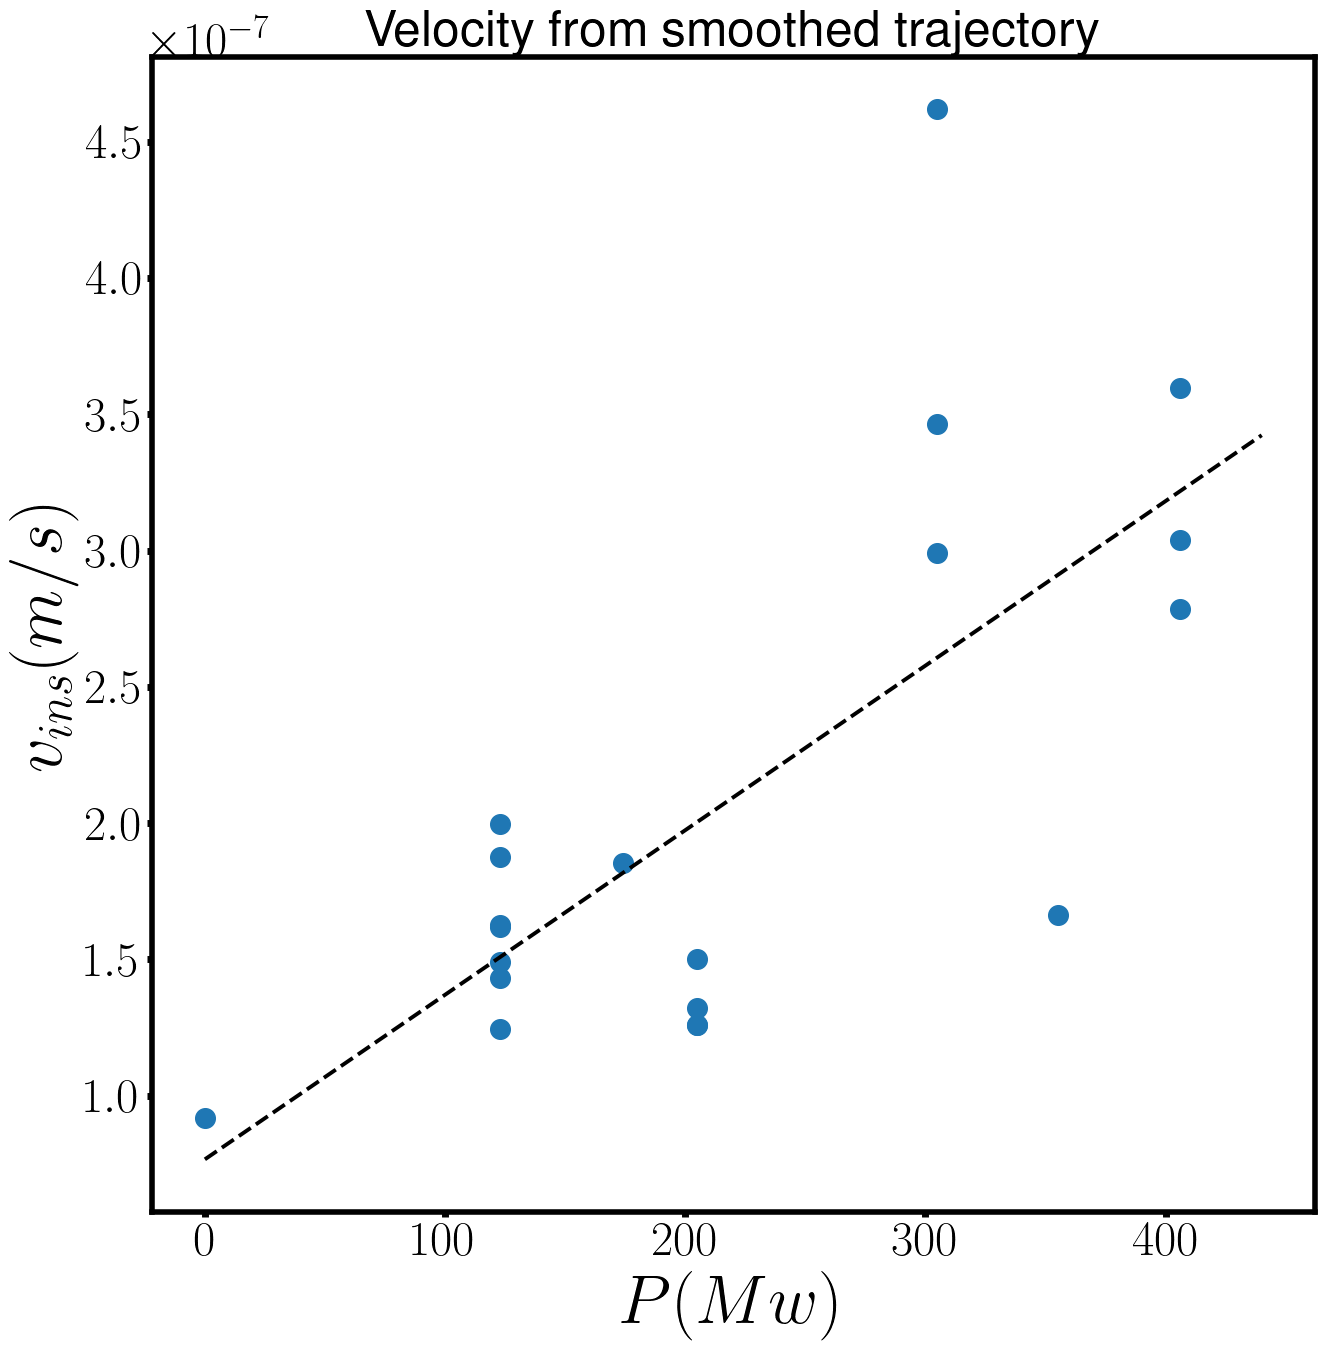

In [16]:
plt.clf()
plt.rcParams.update({'font.size': 30})
fig, (ax1) = plt.subplots(1, figsize=(15, 15)) #you can add ax1, ax2 etc
plt.scatter(VelRes['P(mW)'],VelRes['V_ins'],marker = '.', s = 800,alpha=1)#,label=File_names[Iparticle][:13])
plt.plot(fitX1,fitY1,'--',color='black',linewidth=2.8)
#setting scale
#plt.xscale("log")
#plt.yscale("log")

plt.rc('xtick', labelsize=35) 
plt.rc('ytick', labelsize=35)  
plt.xlabel(r'$P(Mw)$', size=50)
plt.ylabel(r'$v_{ins} (m/s)$', size=50)
plt.title("Velocity from smoothed trajectory")

#changing the width of axis lines
for axis in ['top','bottom','left','right']:
    ax1.spines[axis].set_linewidth(4)

plt.tick_params(width=5)

## $v_{ins}$ from smoothing trajectory

In [82]:
# fitting data with errobars
parameters, covariance = curve_fit(linear_func, VelRes['P(mW)'],VelRes['vi'])
SE = np.sqrt(np.diag(covariance))
# Print the results
print("Coefficients: ", parameters)
print("Standard errors: ",SE)

# Elementos para graficar
fitA1 = parameters[0]
fitB1 = parameters[1]
fitX1 = np.linspace(0.0,440,500)
fitY1 = linear_func(fitX1,fitA1,fitB1)#,fitv,fitTr) 

Coefficients:  [0.00044576 0.05655107]
Standard errors:  [0.00014401 0.03533166]


<Figure size 640x480 with 0 Axes>

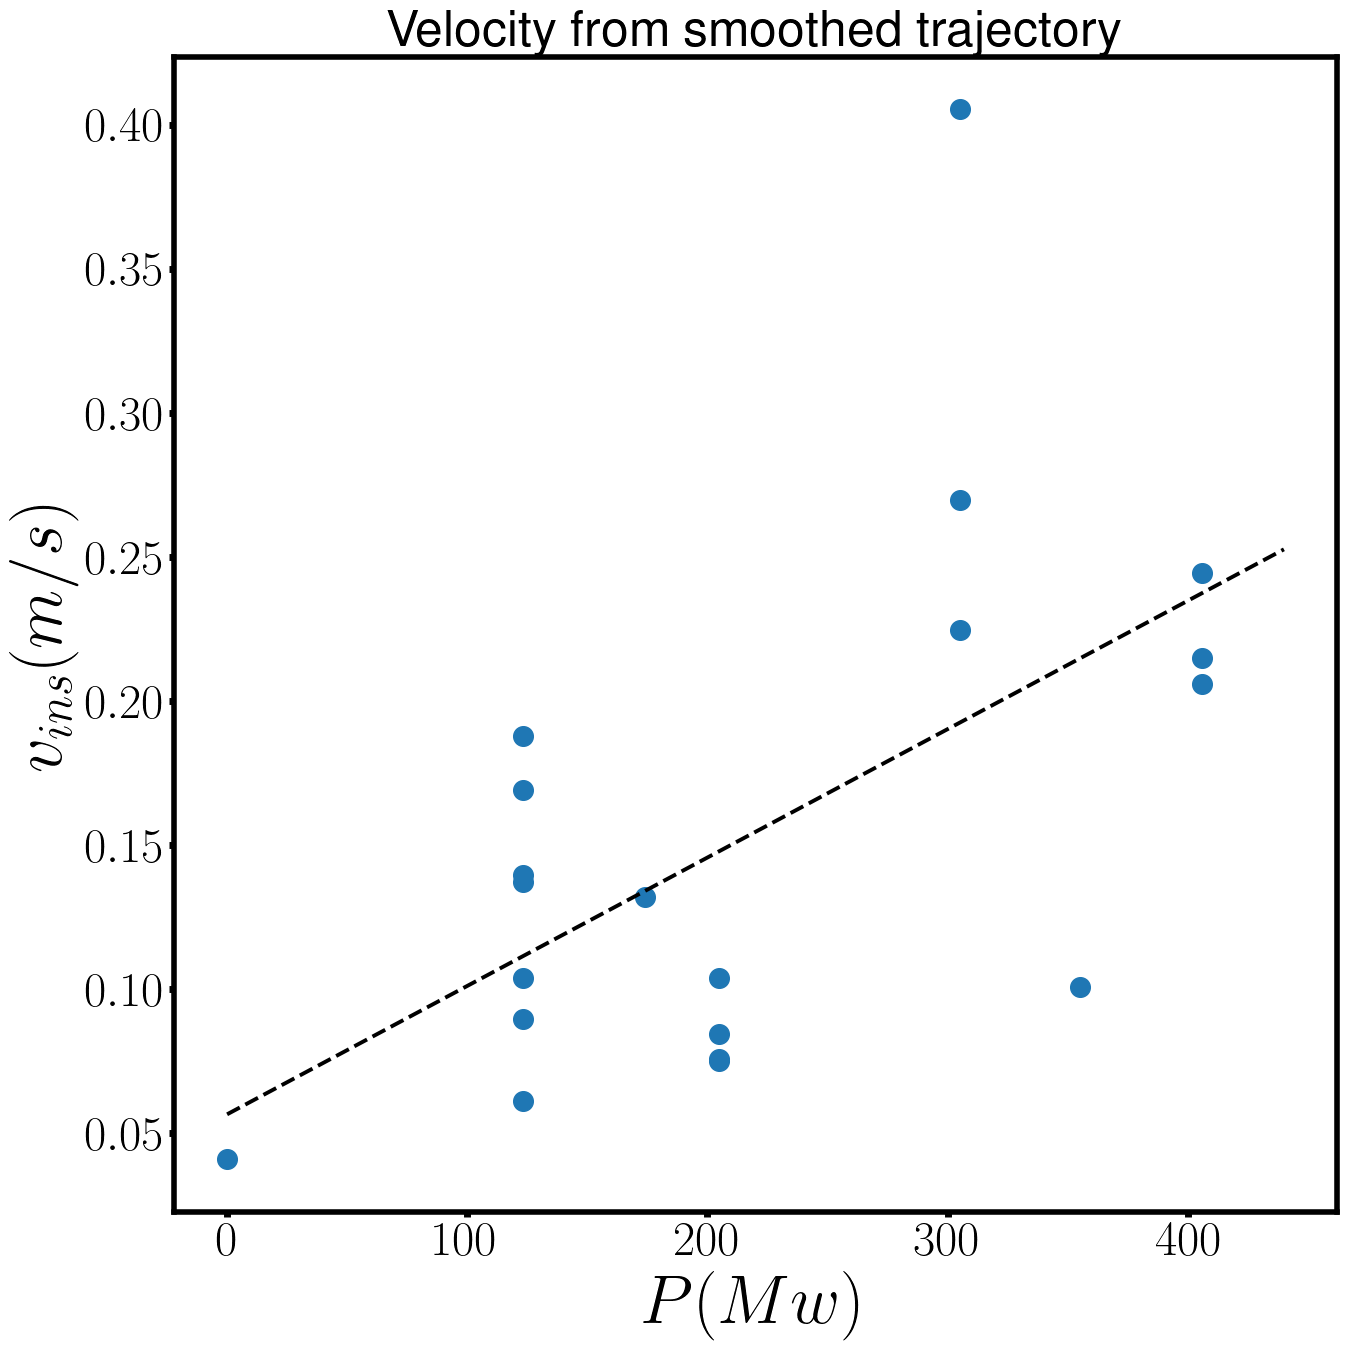

In [83]:
plt.clf()
plt.rcParams.update({'font.size': 30})
fig, (ax1) = plt.subplots(1, figsize=(15, 15)) #you can add ax1, ax2 etc
plt.scatter(VelRes['P(mW)'],VelRes['vi'],marker = '.', s = 800,alpha=1)#,label=File_names[Iparticle][:13])
plt.plot(fitX1,fitY1,'--',color='black',linewidth=2.8)
#setting scale
#plt.xscale("log")
#plt.yscale("log")

plt.rc('xtick', labelsize=35) 
plt.rc('ytick', labelsize=35)  
plt.xlabel(r'$P(Mw)$', size=50)
plt.ylabel(r'$v_{ins} (m/s)$', size=50)
plt.title("Velocity from smoothed trajectory")

#changing the width of axis lines
for axis in ['top','bottom','left','right']:
    ax1.spines[axis].set_linewidth(4)

plt.tick_params(width=5)

<Figure size 640x480 with 0 Axes>

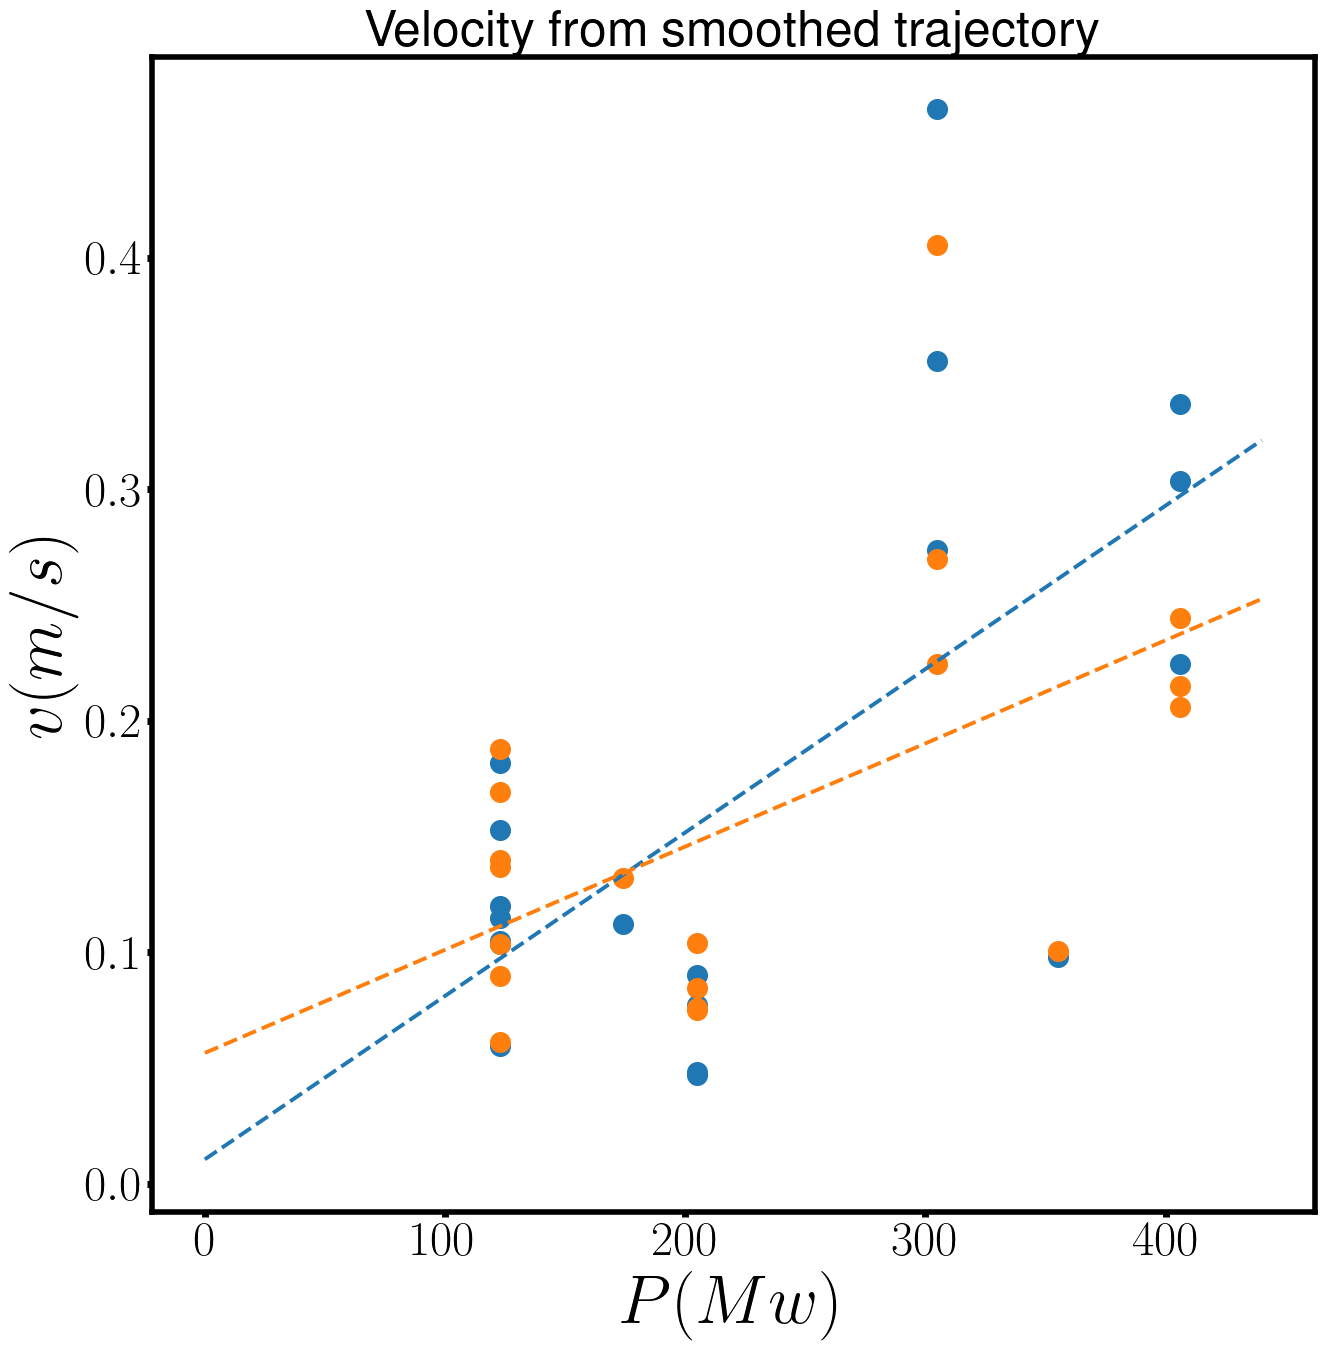

In [88]:
plt.clf()
plt.rcParams.update({'font.size': 30})
fig, (ax1) = plt.subplots(1, figsize=(15, 15)) #you can add ax1, ax2 etc
plt.scatter(VelRes['P(mW)'][:-1],VelRes['V_fit'][:-1]*(1e6),marker = '.', s = 800,alpha=1)
plt.plot(fitX,fitY*(1e6),'--',linewidth=2.8)

plt.scatter(VelRes['P(mW)'][:-1],VelRes['vi'][:-1],marker = '.', s = 800,alpha=1)#,label=File_names[Iparticle][:13])
plt.plot(fitX1,fitY1,'--',linewidth=2.8)
#setting scale
#plt.xscale("log")
#plt.yscale("log")

plt.rc('xtick', labelsize=35) 
plt.rc('ytick', labelsize=35)  
plt.xlabel(r'$P(Mw)$', size=50)
plt.ylabel(r'$v (m/s)$', size=50)
plt.title("Velocity from smoothed trajectory")

#changing the width of axis lines
for axis in ['top','bottom','left','right']:
    ax1.spines[axis].set_linewidth(4)

plt.tick_params(width=5)

# Estimación Tr para segunda tanda de datos

In [114]:
# Extrayendo los resultados de matlab
Root2 = 'D:\\Videos_Lab\\20231124_Janus200nm_4um_CPyCl_1mM\\coords\\'

File_names02 = pd.read_csv(Root2+'filenames.txt',sep='\t')
File_names2 = np.array(File_names02)

VelRes2 = pd.read_csv(Root2+'results/Results_active.csv')
VelRes2

,laser power,D_q,T_q,D_T,V_ins,V_std,V_fit
0,064mw_01_100-8,49.719470,0.020113,3.243700e-14,1.030900e-07,0,3.994700e-08
1,103mw_01_100-8,34.021080,0.029394,3.764600e-14,1.151700e-07,0,5.854600e-08
2,144mw_01_3000-,184.147000,0.005430,3.284500e-14,1.379500e-07,0,1.019200e-07
3,144mw_02_100-6,5.227558,0.191294,3.486800e-14,1.225800e-07,0,7.388600e-08
4,184mw_01_100-4,55.273500,0.018092,2.803600e-14,1.107500e-07,0,6.721700e-08
5,225mw_01_100-3,0.299473,3.339199,4.647100e-14,1.973400e-07,0,1.690400e-07
6,225mw_02_100-5,27.154740,0.036826,4.733400e-14,1.525000e-07,0,1.065000e-07
7,265mw_01_100-1,0.904344,1.105774,4.021700e-14,2.672000e-07,0,2.558200e-07
8,265mw_02_100-1,13.493460,0.074110,3.367400e-14,1.734600e-07,0,1.498000e-07
9,265mw_03_100-1,0.202231,4.944837,4.788600e-14,2.450600e-07,0,2.150600e-07


In [115]:
#Modificando el último nombre
VelRes2.at[24, 'laser power'] = '0mW_01_100-1'

In [116]:
# agregando una columna con los valores de Potencias
powerlist2 = [int(power[:-11]) for power in VelRes2['laser power']]
VelRes2['P(mW)'] = powerlist2

In [117]:
VelRes2['Eta'] = (kB*Temp/((VelRes2['D_T'])*6.0*np.pi*R))*(1e3)
eta_norm = 2.776051
VelRes2['Eta_n'] = VelRes2['Eta']/eta_norm

In [118]:
# getting vins std
Vins_std2 = [(np.loadtxt(Root2+'results\\Vins_'+name[0]+'.dat')).std() for name in File_names2]

In [119]:
VelRes2['V_std'] = Vins_std2
VelRes2

,laser power,D_q,T_q,D_T,V_ins,V_std,V_fit,P(mW),Eta,Eta_n
0,064mw_01_100-8,49.719470,0.020113,3.243700e-14,1.030900e-07,5.443381e-08,3.994700e-08,64,2.853272,1.027817
1,103mw_01_100-8,34.021080,0.029394,3.764600e-14,1.151700e-07,6.167560e-08,5.854600e-08,103,2.458471,0.885600
2,144mw_01_3000-,184.147000,0.005430,3.284500e-14,1.379500e-07,7.365444e-08,1.019200e-07,144,2.817829,1.015049
3,144mw_02_100-6,5.227558,0.191294,3.486800e-14,1.225800e-07,6.342811e-08,7.388600e-08,144,2.654342,0.956158
4,184mw_01_100-4,55.273500,0.018092,2.803600e-14,1.107500e-07,6.104459e-08,6.721700e-08,184,3.301170,1.189160
5,225mw_01_100-3,0.299473,3.339199,4.647100e-14,1.973400e-07,8.869573e-08,1.690400e-07,225,1.991599,0.717422
6,225mw_02_100-5,27.154740,0.036826,4.733400e-14,1.525000e-07,7.841603e-08,1.065000e-07,225,1.955288,0.704341
7,265mw_01_100-1,0.904344,1.105774,4.021700e-14,2.672000e-07,1.045771e-07,2.558200e-07,265,2.301305,0.828985
8,265mw_02_100-1,13.493460,0.074110,3.367400e-14,1.734600e-07,8.090611e-08,1.498000e-07,265,2.748459,0.990061
9,265mw_03_100-1,0.202231,4.944837,4.788600e-14,2.450600e-07,9.137478e-08,2.150600e-07,265,1.932749,0.696222


# Rotational diffusion time estimation

In [120]:
%%time
# ------------------------------------------------------------------
X2 = []
Y2 = []
Q2 = []
T2 = []

TAU2 = [] 
MSAD2 = []
DR2 = []
TR2 = []

Nfilename2 = []
NPowers2 = []
Starts2 = []
Stops2 = []

# Corriendo lo anterior para todos los archivos
for npower, filename in enumerate(File_names2):
    #print(filename)
    # extracting data from that filename
    t,X0,Y0,qx,qy,Vins0,Q0 = getdata(filename[0],Root2)
    
    # computing theta
    theta0 = np.arctan2(qy,qx)
    
    # Estimando las diferencias absolutas de la orientación
    dq = (theta0[1:]-theta0[:-1]) 
    q_std = np.pi/2
    
    # implementando una forma de hacer los angulos entre -inf e inf
    theta = fixtheta(theta0,dq)
    
    # volviendo a estimar diferencia de angulos
    dq = (theta[1:]-theta[:-1]) 
    # Estableciendo un nuevo criterio para corregir los datos
    q_std = 0.55
    
    theta = outlier_replace(theta,q_std,50) # average over 50 values
    
    # localizando las regiones bien comportadas de theta
    # recalculando dq
    dq = (theta[1:]-theta[:-1]) 

    # Estimando la desviación estandar en ventanas de 10s (500 cuadros)

    m = 1000  # Number of values to group together
    
    StDF = windows(dq,m)
    # storing coords
    X2.append(X0)
    Y2.append(Y0)
    Q2.append(theta)
    T2.append(t)
    
    # ahora solo falta obtener los indices iniciales y finales para calcular el MSAD
    starts, ends = delimitations(StDF)
    
    # Computing the values of interest
    for start,stop in zip(starts,ends):
        
        # computing MSAD
        Tau, MSDq = MSD(theta[start:stop],t[start:stop])

        # applying data fitting
        Dr,Tr,fitx,fity = fit_MSAD(Tau,MSDq)
        
        
        # -----------------------------------------------------------
        # Suavisado de la trayectoria
        # Suponiendo un tamaño dado a partir de la media de Tr
        
        
        # Storing the results -----------------------------------------------------

        TAU2.append(Tau)
        MSAD2.append(MSDq)
        DR2.append(Dr)
        TR2.append(Tr)

        Nfilename2.append(filename[0][:-6])
        NPowers2.append(VelRes2['P(mW)'][npower])
        Starts2.append(start)
        Stops2.append(stop)
        

CPU times: total: 29.9 s
Wall time: 9.95 s


In [121]:
# condensando todo en una tabla
TrDF2 = pd.DataFrame({'Filename':Nfilename2,'P(mW)':NPowers2,'Start':Starts2,'Stop':Stops2,'Dr':DR2,'Tr':TR2})
TrDF2

,Filename,P(mW),Start,Stop,Dr,Tr
0,01_Laser064mw_01_100-87000,64,0,1000,0.124904,8.006169
1,01_Laser064mw_01_100-87000,64,5000,7000,0.030590,32.690489
2,01_Laser064mw_01_100-87000,64,8000,20000,0.013031,76.738881
3,01_Laser064mw_01_100-87000,64,21000,28000,0.017638,56.695613
4,01_Laser064mw_01_100-87000,64,30000,40000,0.017062,58.610483
...,...,...,...,...,...,...
70,01_Laser425mw_03_100-16600,425,4000,15000,0.037156,26.913422
71,01_Laser425mw_04_100-4100,425,0,2000,0.010642,93.968841
72,01_Laser425mw_05_100-179850,425,0,8000,0.087498,11.428810
73,01_Laser425mw_05_100-9950,425,0,8000,0.087498,11.428810


<Figure size 640x480 with 0 Axes>

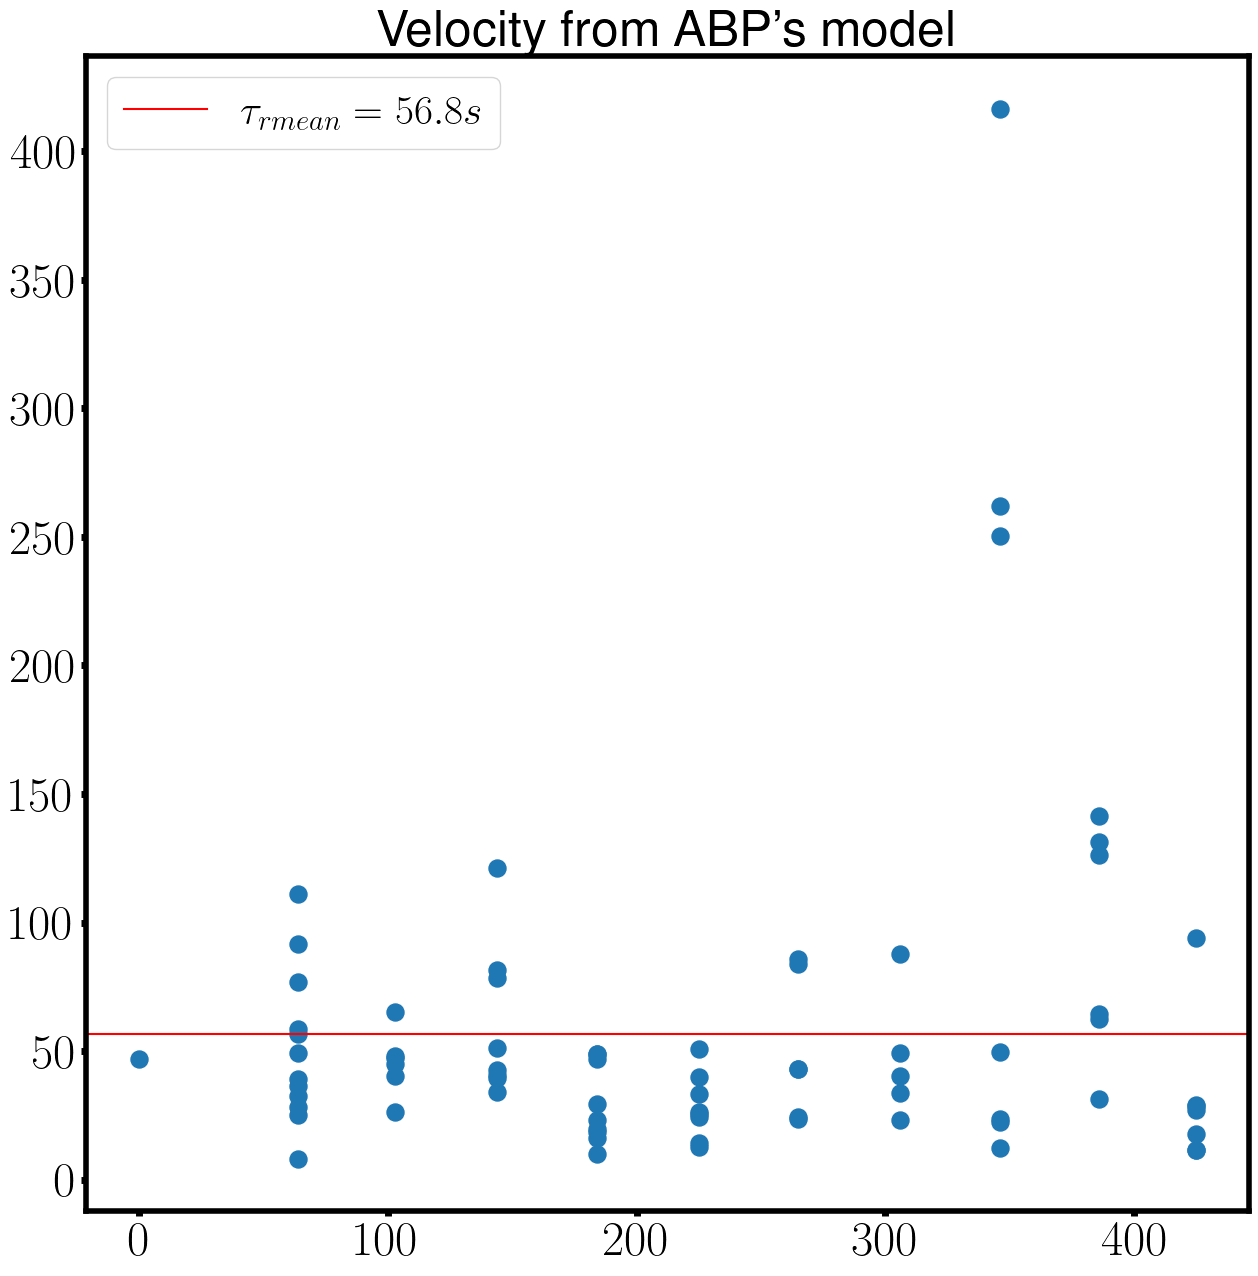

In [122]:
# graficando los tiempos de difusión rotacional

plt.clf()
plt.rcParams.update({'font.size': 30})
fig, (ax1) = plt.subplots(1, figsize=(15, 15)) #you can add ax1, ax2 etc
plt.scatter(TrDF2['P(mW)'],TrDF2['Tr'],marker = '.', s = 600,alpha=1)
#plt.plot(t[1000:-1000],smoothed_x[1000:-1000],'-',color='black',linewidth=2.8)

plt.axhline(y = TrDF2['Tr'].mean(), color = 'r', linestyle = '-',label=r'$\tau_{rmean}='+str(TrDF2['Tr'].mean())[:4]+' s$')

#plt.plot(t[4400:4700],theta[4400:4700],'-',linewidth=2.8)
#setting scale
#plt.xscale("log")
#plt.yscale("log")

plt.rc('xtick', labelsize=35) 
plt.rc('ytick', labelsize=35)  
#plt.xlabel(r'$time (s)$', size=50)
#plt.ylabel(r'$q (rad)$', size=50)
plt.title("Velocity from ABP's model")
plt.legend(loc='upper left')

#changing the width of axis lines
for axis in ['top','bottom','left','right']:
    ax1.spines[axis].set_linewidth(4)

plt.tick_params(width=5)

In [123]:
# Si consideramos solo los casos donde 20.0<Tr<140.0
Tr_mean2 = (TrDF2.loc[(TrDF2['Tr']>20.0) & (TrDF2['Tr']<140.0) ])['Tr'].mean()
Tr_mean2

50.63768049006035

# Smoothing trajectories 

In [127]:
%%time
Vels2 = []
Speeds2 = []
VMean2 = []
VStd2 = []

# usando una ventana de tiempo Tr_mean
window_size2 = int(Tr_mean2*fs)
    
for iname,filename in enumerate(File_names2):
    # extrayendo los datos de coordenadas en micras
    x = X2[iname]*Pix2microns
    y = Y2[iname]*Pix2microns
    t = T2[iname]
    
    # suavisando los datos a través del promedio
    
    s_x = smooth(x,window_size2)
    s_y = smooth(y,window_size2)
    # recortando los datos sesgados (aprox Tr/2)
    crop_size = int((window_size2/2)+1)
    # Calculando la velocidad instantanea
    v,speed = velocity(s_x,s_y,t)
    
    # estimando velocidad instantanea promedio
    vmean = speed[crop_size:-crop_size].mean()
    vstd = speed[crop_size:-crop_size].std()
    # storing data
    Vels2.append(v)
    Speeds2.append(speed)
    VMean2.append(vmean)
    VStd2.append(vstd)
    

CPU times: total: 688 ms
Wall time: 860 ms


In [128]:
# adding the results to velRes
VelRes2['vi'] = VMean2
VelRes2['vistd'] = VStd2

In [129]:
VelRes2

,laser power,D_q,T_q,D_T,V_ins,V_std,V_fit,P(mW),Eta,Eta_n,vi,vistd
0,064mw_01_100-8,49.719470,0.020113,3.243700e-14,1.030900e-07,5.443381e-08,3.994700e-08,64,2.853272,1.027817,0.057340,0.031960
1,103mw_01_100-8,34.021080,0.029394,3.764600e-14,1.151700e-07,6.167560e-08,5.854600e-08,103,2.458471,0.885600,0.072697,0.034960
2,144mw_01_3000-,184.147000,0.005430,3.284500e-14,1.379500e-07,7.365444e-08,1.019200e-07,144,2.817829,1.015049,0.095622,0.050977
3,144mw_02_100-6,5.227558,0.191294,3.486800e-14,1.225800e-07,6.342811e-08,7.388600e-08,144,2.654342,0.956158,0.083838,0.034405
4,184mw_01_100-4,55.273500,0.018092,2.803600e-14,1.107500e-07,6.104459e-08,6.721700e-08,184,3.301170,1.189160,0.075435,0.029027
5,225mw_01_100-3,0.299473,3.339199,4.647100e-14,1.973400e-07,8.869573e-08,1.690400e-07,225,1.991599,0.717422,0.153207,0.070062
6,225mw_02_100-5,27.154740,0.036826,4.733400e-14,1.525000e-07,7.841603e-08,1.065000e-07,225,1.955288,0.704341,0.106392,0.056262
7,265mw_01_100-1,0.904344,1.105774,4.021700e-14,2.672000e-07,1.045771e-07,2.558200e-07,265,2.301305,0.828985,0.215137,0.076947
8,265mw_02_100-1,13.493460,0.074110,3.367400e-14,1.734600e-07,8.090611e-08,1.498000e-07,265,2.748459,0.990061,0.136653,0.069686
9,265mw_03_100-1,0.202231,4.944837,4.788600e-14,2.450600e-07,9.137478e-08,2.150600e-07,265,1.932749,0.696222,0.183648,0.059075


# comparando velocidades

<Figure size 640x480 with 0 Axes>

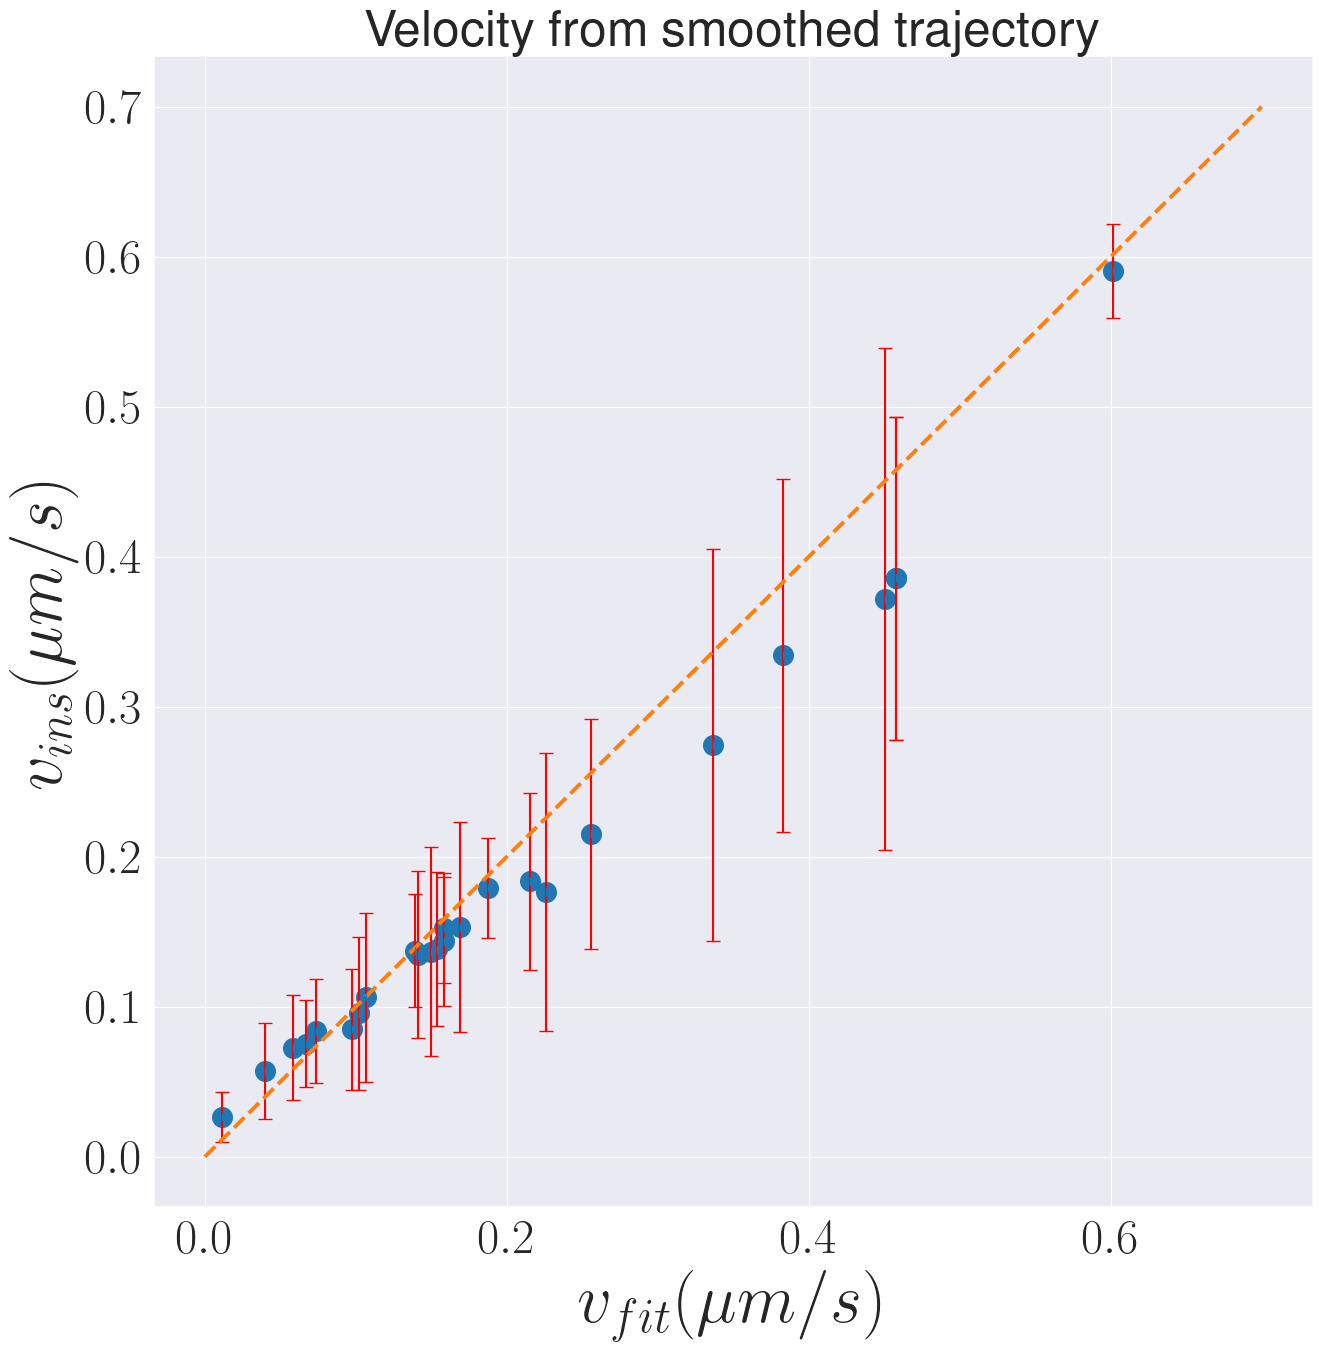

In [130]:
plt.clf()
plt.rcParams.update({'font.size': 30})

velx = np.linspace(0.0, 0.7,100)
vely = velx

with sns.axes_style("darkgrid"):
    fig, (ax1) = plt.subplots(1, figsize=(15, 15)) #you can add ax1, ax2 etc
    plt.scatter(VelRes2['V_fit']*(1e6),VelRes2['vi'],marker = '.', s = 800,alpha=1)
    
    plt.errorbar(VelRes2['V_fit']*(1e6), VelRes2['vi'], yerr=VelRes2['vistd'],capsize=5,fmt="|",ecolor='red')
    plt.plot(velx,vely,'--',linewidth=2.8)

    #setting scale
    #plt.xscale("log")
    #plt.yscale("log")

    plt.rc('xtick', labelsize=35) 
    plt.rc('ytick', labelsize=35)  
    
    plt.xlabel(r'$v_{fit} (\mu m/s)$', size=50)
    plt.ylabel(r'$v_{ins} (\mu m/s)$', size=50)
    plt.title("Velocity from smoothed trajectory")

    #changing the width of axis lines
    for axis in ['top','bottom','left','right']:
        ax1.spines[axis].set_linewidth(4)

    plt.tick_params(width=5)

<Figure size 640x480 with 0 Axes>

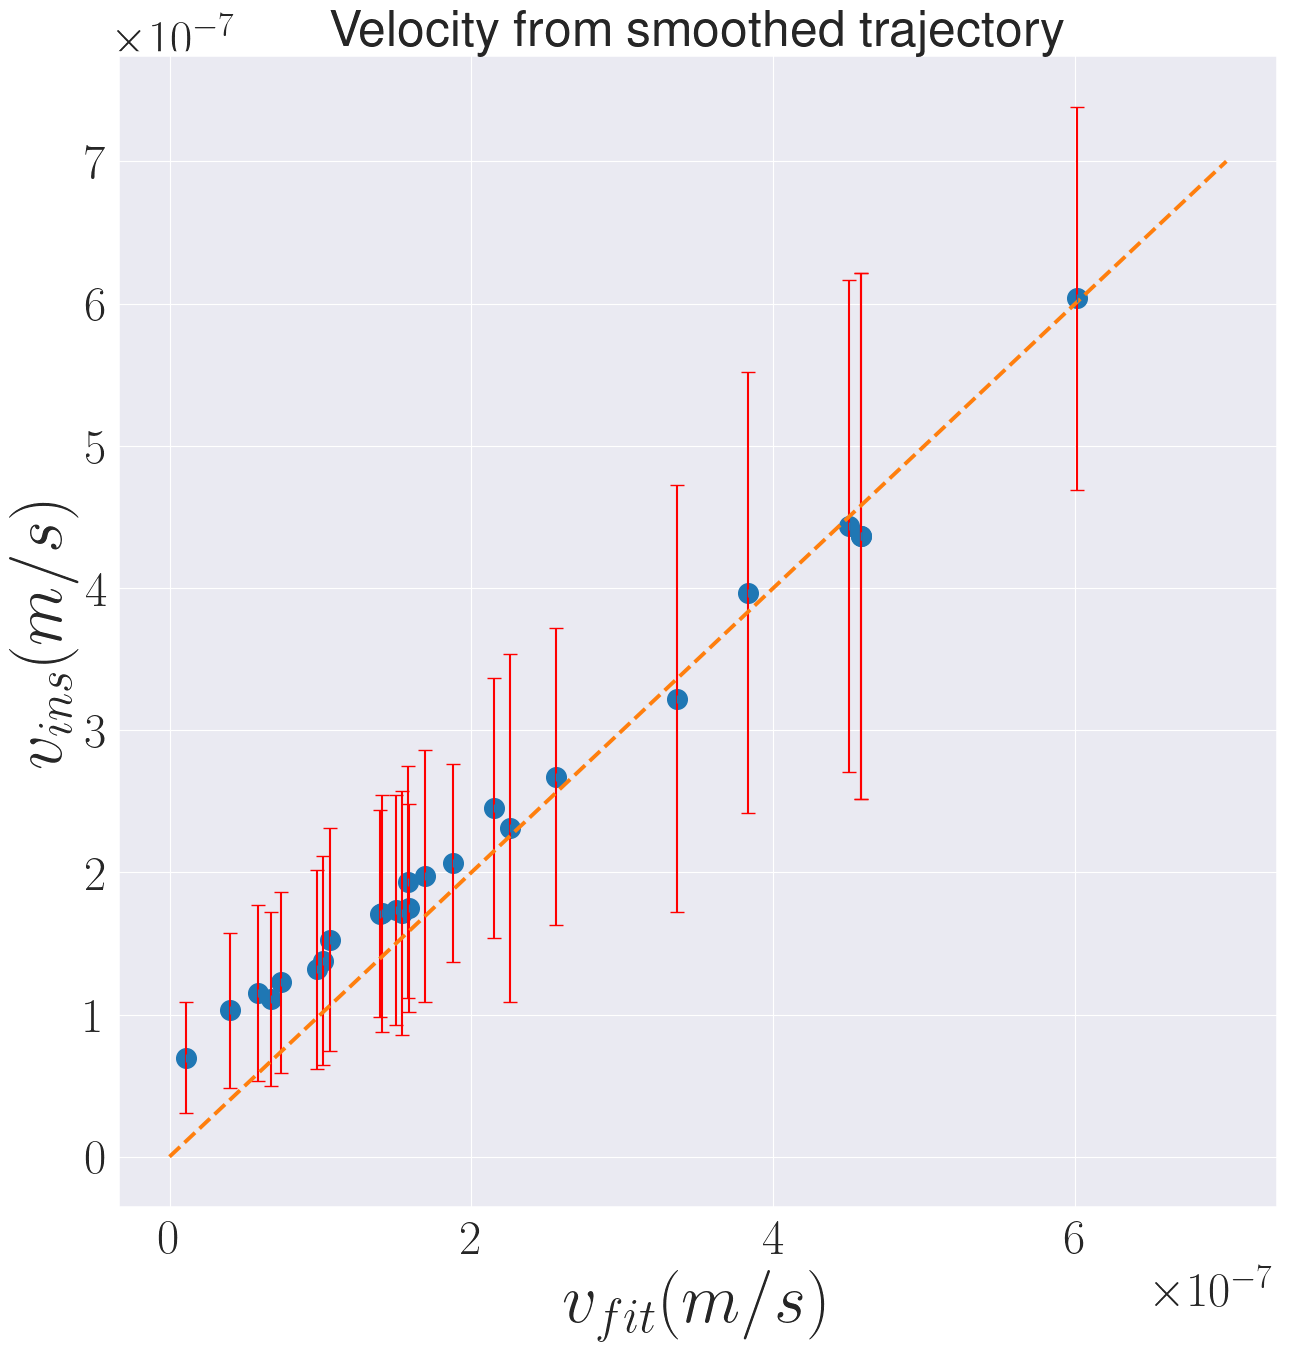

In [131]:
plt.clf()
plt.rcParams.update({'font.size': 30})

velx = np.linspace(0.0, 7.0e-7,100)
vely = velx

with sns.axes_style("darkgrid"):
    fig, (ax1) = plt.subplots(1, figsize=(15, 15)) #you can add ax1, ax2 etc
    plt.scatter(VelRes2['V_fit'],VelRes2['V_ins'],marker = '.', s = 800,alpha=1)
    
    plt.errorbar(VelRes2['V_fit'], VelRes2['V_ins'], yerr=VelRes2['V_std'],capsize=5,fmt="|",ecolor='red')
    plt.plot(velx,vely,'--',linewidth=2.8)

    #setting scale
    #plt.xscale("log")
    #plt.yscale("log")

    plt.rc('xtick', labelsize=35) 
    plt.rc('ytick', labelsize=35)  
    
    plt.xlabel(r'$v_{fit} (m/s)$', size=50)
    plt.ylabel(r'$v_{ins} (m/s)$', size=50)
    plt.title("Velocity from smoothed trajectory")

    #changing the width of axis lines
    for axis in ['top','bottom','left','right']:
        ax1.spines[axis].set_linewidth(4)

    plt.tick_params(width=5)

# laser power vs velocity (instantaneous and from ABP's model)

In [143]:
# fitting data with errobars
parameters, covariance = curve_fit(linear_func, VelRes2['P(mW)'],VelRes2['V_fit'])
SE = np.sqrt(np.diag(covariance))
# Print the results
print("Coefficients: ", parameters)
print("Standard errors: ",SE)

# Elementos para graficar
fitA = parameters[0]
fitB = parameters[1]
fitX = np.linspace(0.0,440,500)
fitY = linear_func(fitX,fitA,fitB)#,fitv,fitTr) 

Coefficients:  [ 9.17610536e-10 -5.79379403e-08]
Standard errors:  [1.68945638e-10 5.32016866e-08]


<Figure size 640x480 with 0 Axes>

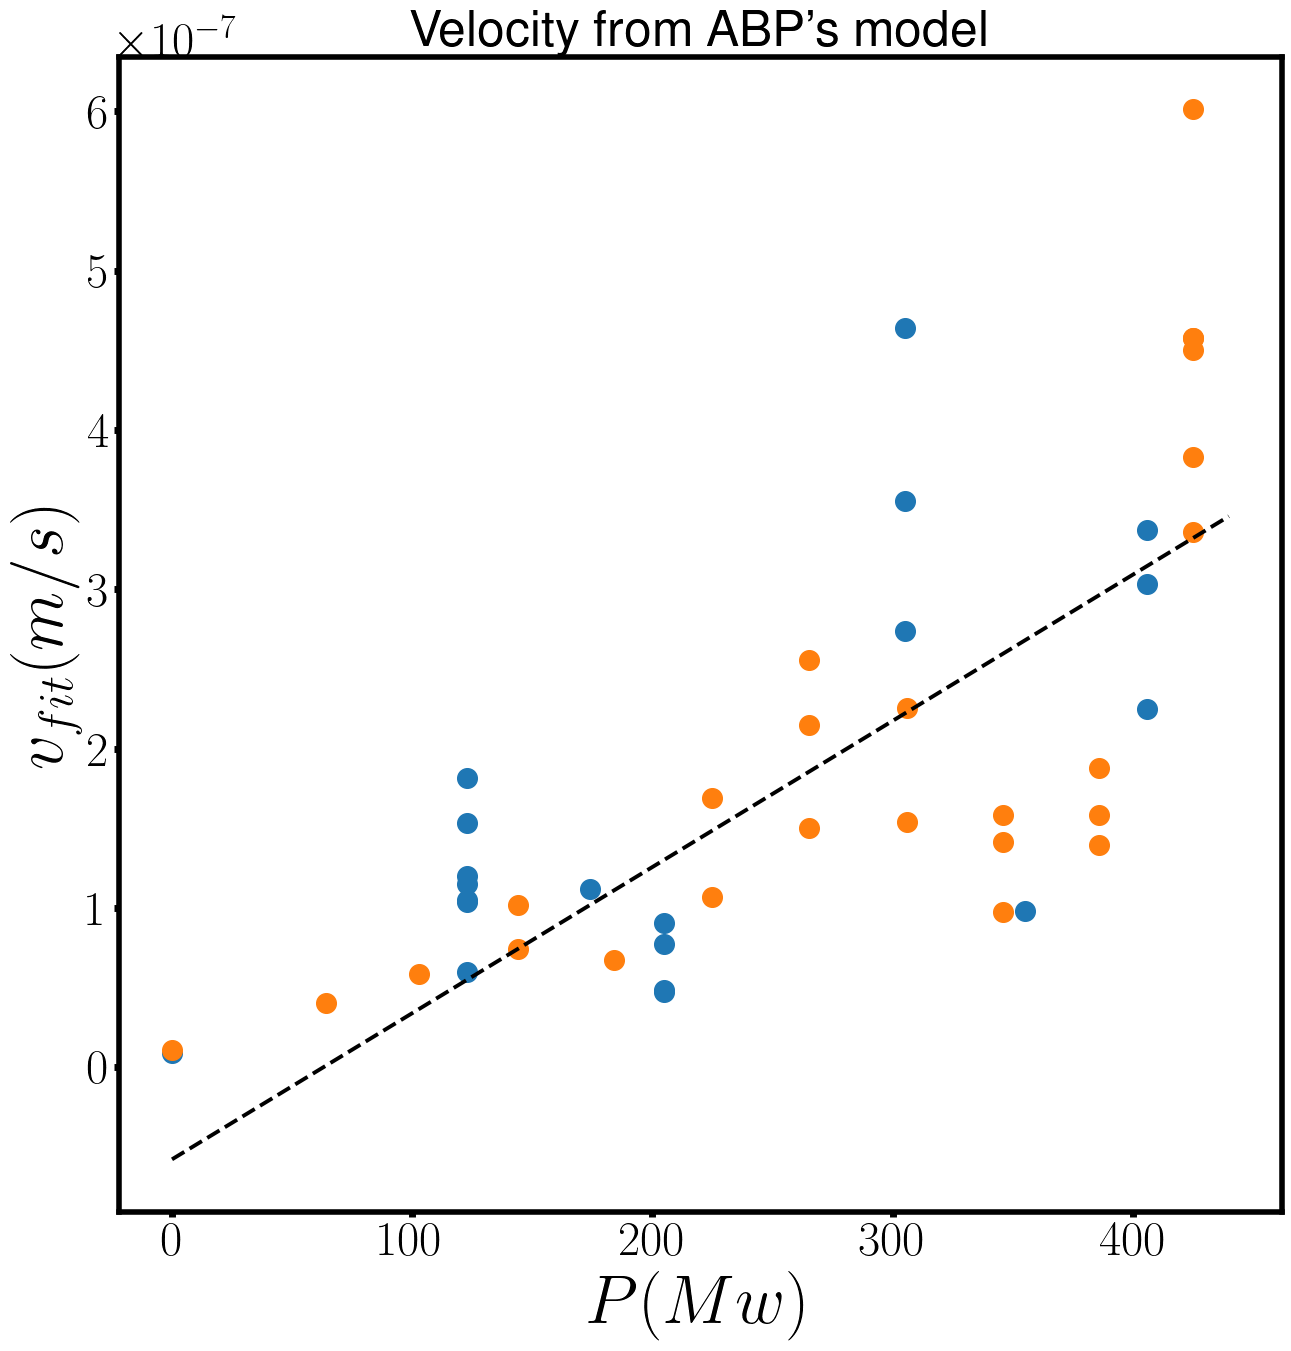

In [145]:
plt.clf()
plt.rcParams.update({'font.size': 30})
fig, (ax1) = plt.subplots(1, figsize=(15, 15)) #you can add ax1, ax2 etc
plt.scatter(VelRes['P(mW)'],VelRes['V_fit'],marker = '.', s = 800,alpha=1)#,label=File_names[Iparticle][:13])
plt.scatter(VelRes2['P(mW)'],VelRes2['V_fit'],marker = '.', s = 800,alpha=1)#,label=File_names[Iparticle][:13])
plt.plot(fitX,fitY,'--',color='black',linewidth=2.8)
#setting scale
#plt.xscale("log")
#plt.yscale("log")

plt.rc('xtick', labelsize=35) 
plt.rc('ytick', labelsize=35)  
plt.xlabel(r'$P(Mw)$', size=50)
plt.ylabel(r'$v_{fit} (m/s)$', size=50)
plt.title("Velocity from ABP's model")

#changing the width of axis lines
for axis in ['top','bottom','left','right']:
    ax1.spines[axis].set_linewidth(4)

plt.tick_params(width=5)

## $v_{ins}$ from smoothing trajectory

In [152]:
# fitting data with errobars
parameters, covariance = curve_fit(linear_func, VelRes2['P(mW)'],VelRes2['V_ins'])
SE = np.sqrt(np.diag(covariance))
# Print the results
print("Coefficients: ", parameters)
print("Standard errors: ",SE)

# Elementos para graficar
fitA1 = parameters[0]
fitB1 = parameters[1]
fitX1 = np.linspace(0.0,440,500)
fitY1 = linear_func(fitX1,fitA1,fitB1)#,fitv,fitTr) 

Coefficients:  [7.64865892e-10 9.88616797e-09]
Standard errors:  [1.54775522e-10 4.87394571e-08]


<Figure size 640x480 with 0 Axes>

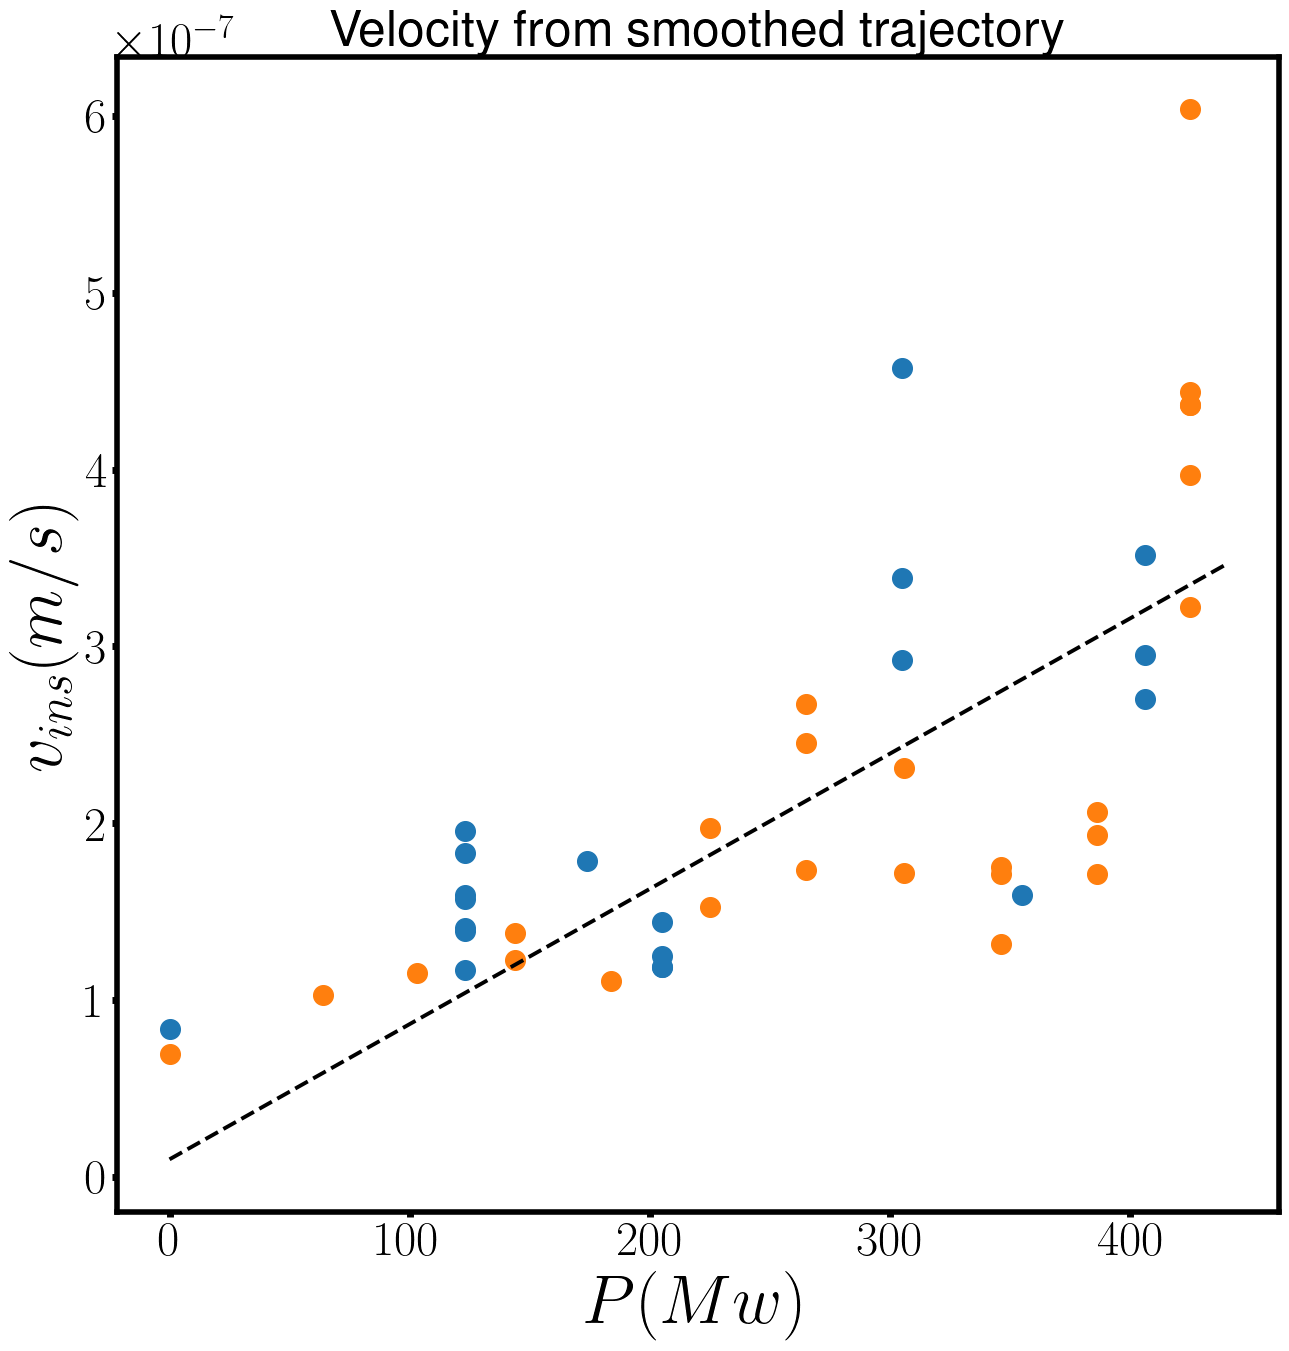

In [153]:
plt.clf()
plt.rcParams.update({'font.size': 30})
fig, (ax1) = plt.subplots(1, figsize=(15, 15)) #you can add ax1, ax2 etc
plt.scatter(VelRes['P(mW)'],VelRes['V_ins'],marker = '.', s = 800,alpha=1)#,label=File_names[Iparticle][:13])
plt.scatter(VelRes2['P(mW)'],VelRes2['V_ins'],marker = '.', s = 800,alpha=1)#,label=File_names[Iparticle][:13])
plt.plot(fitX1,fitY1,'--',color='black',linewidth=2.8)
#setting scale
#plt.xscale("log")
#plt.yscale("log")

plt.rc('xtick', labelsize=35) 
plt.rc('ytick', labelsize=35)  
plt.xlabel(r'$P(Mw)$', size=50)
plt.ylabel(r'$v_{ins} (m/s)$', size=50)
plt.title("Velocity from smoothed trajectory")

#changing the width of axis lines
for axis in ['top','bottom','left','right']:
    ax1.spines[axis].set_linewidth(4)

plt.tick_params(width=5)

In [148]:
# fitting data with errobars
parameters, covariance = curve_fit(linear_func, VelRes2['P(mW)'],VelRes2['vi'])
SE = np.sqrt(np.diag(covariance))
# Print the results
print("Coefficients: ", parameters)
print("Standard errors: ",SE)

# Elementos para graficar
fitA1 = parameters[0]
fitB1 = parameters[1]
fitX1 = np.linspace(0.0,440,500)
fitY1 = linear_func(fitX1,fitA1,fitB1)#,fitv,fitTr) 

Coefficients:  [ 0.00075829 -0.03182868]
Standard errors:  [0.00015304 0.04819266]


<Figure size 640x480 with 0 Axes>

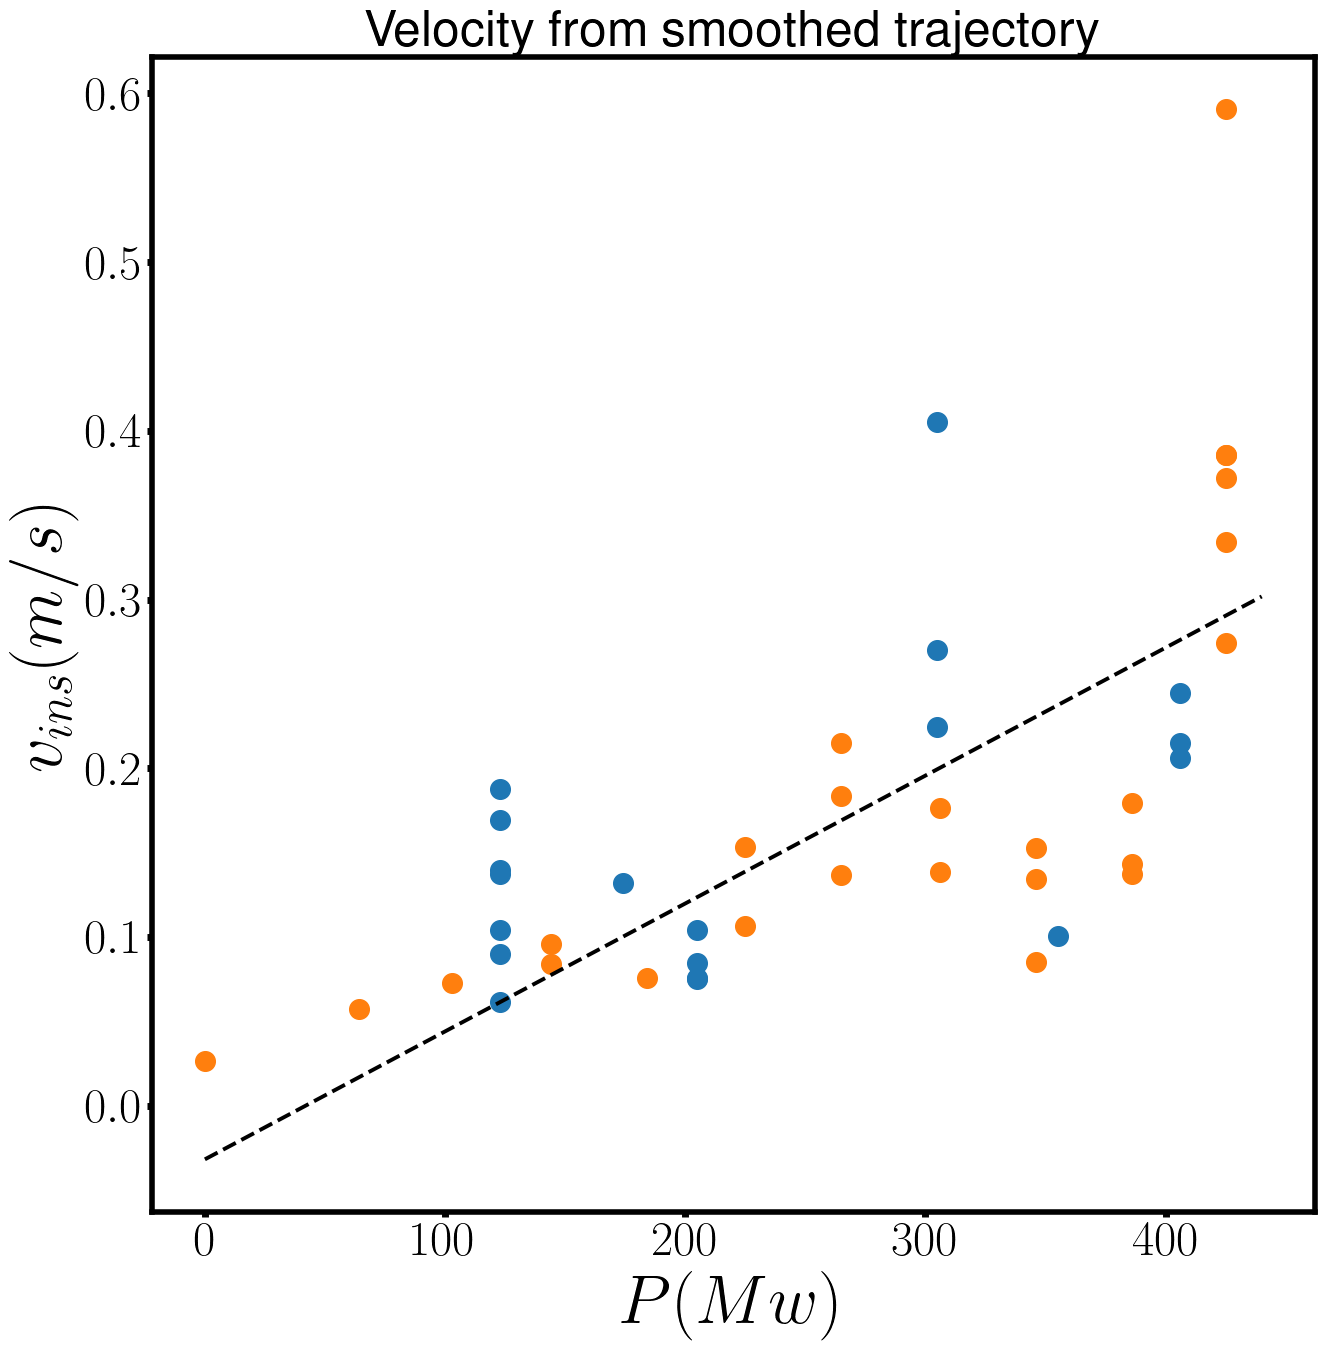

In [150]:
plt.clf()
plt.rcParams.update({'font.size': 30})
fig, (ax1) = plt.subplots(1, figsize=(15, 15)) #you can add ax1, ax2 etc
plt.scatter(VelRes['P(mW)'][:-1],VelRes['vi'][:-1],marker = '.', s = 800,alpha=1)#,label=File_names[Iparticle][:13])
plt.scatter(VelRes2['P(mW)'],VelRes2['vi'],marker = '.', s = 800,alpha=1)#,label=File_names[Iparticle][:13])
plt.plot(fitX1,fitY1,'--',color='black',linewidth=2.8)
#setting scale
#plt.xscale("log")
#plt.yscale("log")

plt.rc('xtick', labelsize=35) 
plt.rc('ytick', labelsize=35)  
plt.xlabel(r'$P(Mw)$', size=50)
plt.ylabel(r'$v_{ins} (m/s)$', size=50)
plt.title("Velocity from smoothed trajectory")

#changing the width of axis lines
for axis in ['top','bottom','left','right']:
    ax1.spines[axis].set_linewidth(4)

plt.tick_params(width=5)

In [142]:
print(VelRes2['V_std'].max()*(1e6))

0.18493161891376747


In [141]:
VelRes2['vistd'].max()

0.16739443526153303